In [ ]:
import pandas as pd

# Data berlabel dari kaggle "Grammar Correction"

In [ ]:
df_gc = pd.read_csv('Grammar Correction.csv')

In [ ]:
df_gc

,Serial Number,Error Type,Ungrammatical Statement,Standard English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.
...,...,...,...,...
2013,2014,Lack of Parallelism in Lists or Series,"The festival celebrates music, culture, and to...","The festival celebrates music, culture, and br..."
2014,2015,Lack of Parallelism in Lists or Series,The seminar will address topics such as career...,The seminar will address topics such as career...
2015,2016,Lack of Parallelism in Lists or Series,The research examines the effects of climate c...,The research examines the effects of climate c...
2016,2017,Lack of Parallelism in Lists or Series,"The report highlights the need for investment,...","The report highlights the need for investment,..."


# Cek distribusi kelas error type

Error Type
Sentence Structure Errors                         103
Verb Tense Errors                                 100
Article Usage                                     100
Subject-Verb Agreement                            100
Spelling Mistakes                                 100
Preposition Usage                                  95
Punctuation Errors                                 60
Relative Clause Errors                             51
Ambiguity                                          50
Negation Errors                                    50
Tautology                                          50
Mixed Metaphors/Idioms                             50
Incorrect Auxiliaries                              50
Slang, Jargon, and Colloquialisms                  50
Gerund and Participle Errors                       50
Abbreviation Errors                                50
Lack of Parallelism in Lists or Series             50
Agreement in Comparative and Superlative Forms     49
Passive Voice Ove

/tmp/ipython-input-5-1438004604.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_gc, y='Error Type', order = df_gc['Error Type'].value_counts().index, palette='viridis')


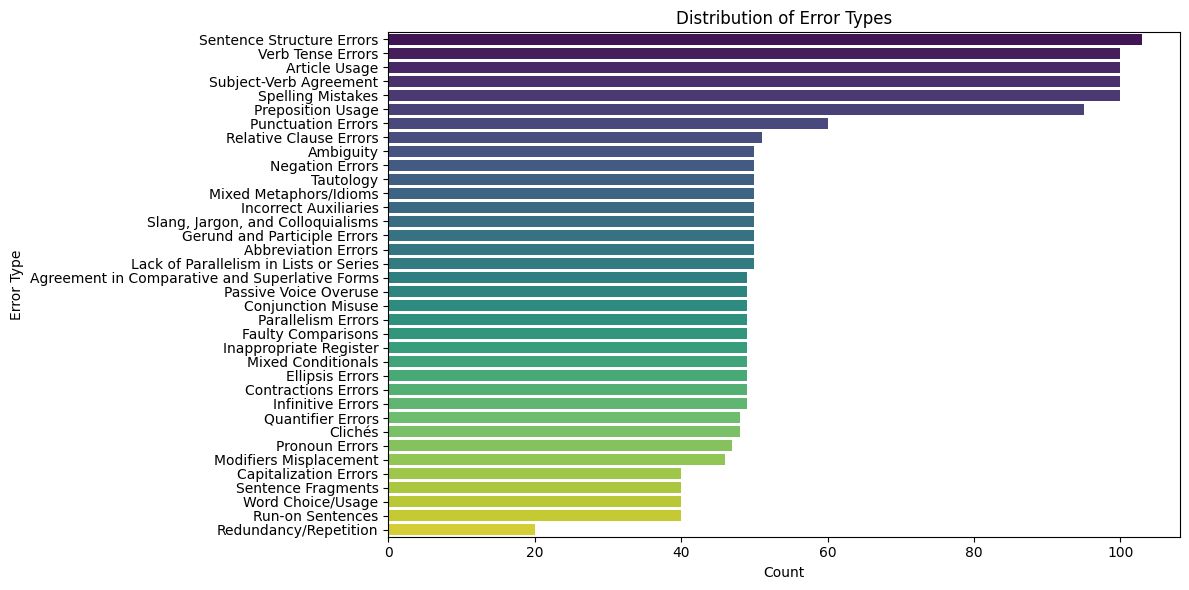

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of 'Error Type'
print(df_gc['Error Type'].value_counts())

# Visualize the distribution of 'Error Type'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_gc, y='Error Type', order = df_gc['Error Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Error Types')
plt.xlabel('Count')
plt.ylabel('Error Type')
plt.tight_layout()
plt.show()


# Random oversampling untuk mengatasi imbalance class


Distribution of Error Types after Random Oversampling:
Error Type
Verb Tense Errors                                 103
Subject-Verb Agreement                            103
Article Usage                                     103
Preposition Usage                                 103
Sentence Structure Errors                         103
Spelling Mistakes                                 103
Punctuation Errors                                103
Capitalization Errors                             103
Word Choice/Usage                                 103
Run-on Sentences                                  103
Sentence Fragments                                103
Redundancy/Repetition                             103
Mixed Metaphors/Idioms                            103
Passive Voice Overuse                             103
Pronoun Errors                                    103
Conjunction Misuse                                103
Modifiers Misplacement                            103
Agreement in Co

/tmp/ipython-input-6-3925272040.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_gc_resampled, y='Error Type', order = df_gc_resampled['Error Type'].value_counts().index, palette='viridis')


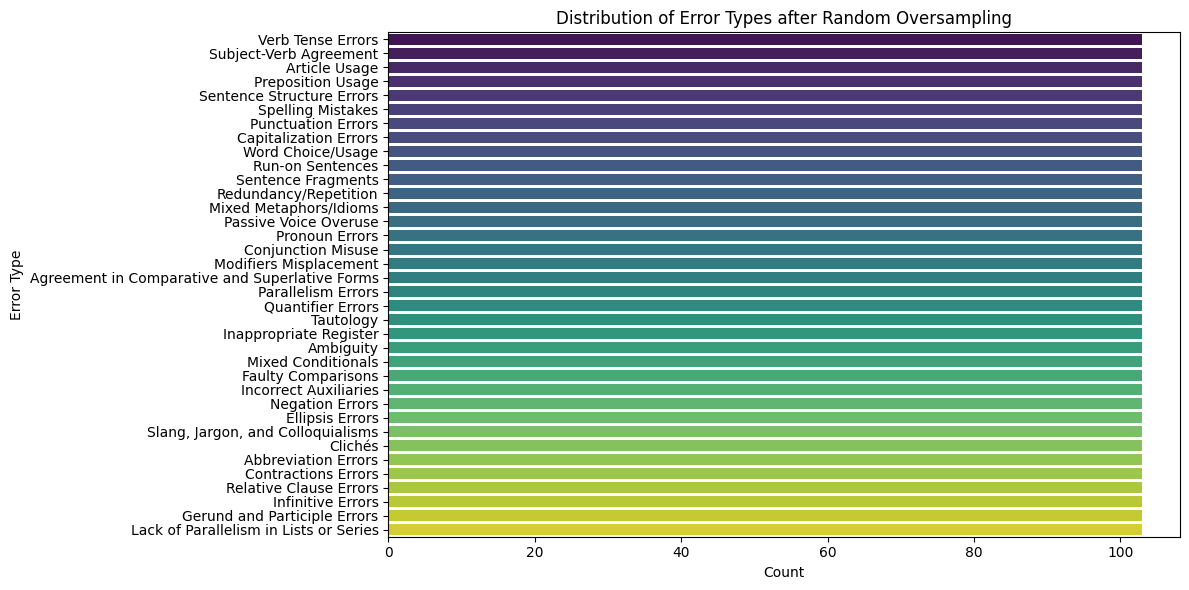

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Identify the target column and the maximum count
target_column = 'Error Type'
max_count = df_gc[target_column].value_counts().max()

# Separate features and target
X = df_gc.drop(target_column, axis=1)
y = df_gc[target_column]

# Initialize RandomOverSampler
ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)

# Perform random oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine the resampled data into a new DataFrame
df_gc_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_gc_resampled[target_column] = y_resampled

# Verify the new distribution of 'Error Type'
print("\nDistribution of Error Types after Random Oversampling:")
print(df_gc_resampled['Error Type'].value_counts())

# Visualize the distribution of 'Error Type' after oversampling
plt.figure(figsize=(12, 6))
sns.countplot(data=df_gc_resampled, y='Error Type', order = df_gc_resampled['Error Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Error Types after Random Oversampling')
plt.xlabel('Count')
plt.ylabel('Error Type')
plt.tight_layout()
plt.show()

# Cek duplikat dan missing value

In [ ]:
# Cek missing values
print("Missing values before oversampling:")
print(df_gc.isnull().sum())

# Cek duplicated rows
print("\nDuplicated rows before oversampling:")
print(df_gc.duplicated().sum())

# Cek missing values setelah oversampling
print("\nMissing values after oversampling:")
print(df_gc_resampled.isnull().sum())

# Cek duplicated rows setelah oversampling
print("\nDuplicated rows after oversampling:")
print(df_gc_resampled.duplicated().sum())

Missing values before oversampling:
Serial Number              0
Error Type                 0
Ungrammatical Statement    0
Standard English           0
dtype: int64

Duplicated rows before oversampling:
0

Missing values after oversampling:
Serial Number              0
Ungrammatical Statement    0
Standard English           0
Error Type                 0
dtype: int64

Duplicated rows after oversampling:
1690


# Melakukan training untuk pseudo labeling dengan model KNN, Naive Bayes, GBM, MLPClassifier, Logistic Regression, Random Forest, XGBoost, LightGBM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB # Import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Define features and target
features = ['Ungrammatical Statement', 'Standard English']
target = 'Error Type'

# Separate features and target from the resampled data
X = df_gc_resampled[features]
y = df_gc_resampled[target]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable into numerical labels
y_encoded = label_encoder.fit_transform(y)

# Split the resampled data into training and testing sets
# Use the encoded target variable for splitting
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a ColumnTransformer to apply TF-IDF vectorization to the text features
# This allows different transformations to be applied to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('text_ungrammatical', TfidfVectorizer(), 'Ungrammatical Statement'),
        ('text_standard', TfidfVectorizer(), 'Standard English')
    ],
    remainder='passthrough' # Keep other columns (if any, though not in this case)
)

# Define the models and wrap them in a pipeline with the preprocessor
# The pipeline will first apply the preprocessing and then train the model
models = {
    "K-Nearest Neighbors": Pipeline([('preprocessor', preprocessor), ('classifier', KNeighborsClassifier())]),
    # Changed GaussianNB to MultinomialNB to handle sparse data
    "Naive Bayes": Pipeline([('preprocessor', preprocessor), ('classifier', MultinomialNB())]),
    "MLPClassifier": Pipeline([('preprocessor', preprocessor), ('classifier', MLPClassifier(max_iter=1000, random_state=42))]),
    "Logistic Regression": Pipeline([('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=1000, random_state=42))]),
    "Random Forest": Pipeline([('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))]),
    "LightGBM": Pipeline([('preprocessor', preprocessor), ('classifier', lgb.LGBMClassifier(random_state=42))]),
    "XGBoost": Pipeline([('preprocessor', preprocessor), ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))])
}

# Dictionary to store model performance
results = {} # Initialize the results dictionary here

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    # The pipeline's fit method handles both preprocessing and model training
    # Use the encoded target variable for training
    model.fit(X_train, y_train_encoded)
    # The pipeline's predict method handles both preprocessing and prediction
    y_pred_encoded = model.predict(X_test)

    # Decode the predictions back to original string labels for the classification report
    y_pred = label_encoder.inverse_transform(y_pred_encoded)
    y_test_decoded = label_encoder.inverse_transform(y_test_encoded) # Decode the test set labels for comparison

    print(f"\nEvaluation for {name}:")
    # Use the original y_test_decoded for accuracy calculation and classification report
    accuracy = accuracy_score(y_test_decoded, y_pred)
    report = classification_report(y_test_decoded, y_pred, zero_division=0)

    results[name] = {
        'accuracy': accuracy,
        'report': report
    }

    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("-" * 50)

Training K-Nearest Neighbors...

Evaluation for K-Nearest Neighbors:
Accuracy: 0.4097
Classification Report:
                                                precision    recall  f1-score   support

                           Abbreviation Errors       0.41      0.33      0.37        21
Agreement in Comparative and Superlative Forms       0.57      0.70      0.63        23
                                     Ambiguity       0.28      0.52      0.36        21
                                 Article Usage       0.13      0.09      0.11        32
                         Capitalization Errors       0.55      0.71      0.62        17
                                       Clichés       0.29      0.32      0.30        19
                            Conjunction Misuse       0.41      0.60      0.48        25
                           Contractions Errors       0.43      0.55      0.48        29
                               Ellipsis Errors       0.33      0.50      0.40        20
          

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Evaluation for LightGBM:
Accuracy: 0.8100
Classification Report:
                                                precision    recall  f1-score   support

                           Abbreviation Errors       0.82      0.67      0.74        21
Agreement in Comparative and Superlative Forms       1.00      1.00      1.00        23
                                     Ambiguity       0.59      0.76      0.67        21
                                 Article Usage       0.86      0.75      0.80        32
                         Capitalization Errors       0.65      0.76      0.70        17
                                       Clichés       0.76      1.00      0.86        19
                            Conjunction Misuse       0.85      0.92      0.88        25
                           Contractions Errors       0.96      0.93      0.95        29
                               Ellipsis Errors       0.86      0.95      0.90        20
                            Faulty Comparisons       

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:55:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Evaluation for XGBoost:
Accuracy: 0.7938
Classification Report:
                                                precision    recall  f1-score   support

                           Abbreviation Errors       0.78      0.67      0.72        21
Agreement in Comparative and Superlative Forms       1.00      1.00      1.00        23
                                     Ambiguity       0.61      0.81      0.69        21
                                 Article Usage       0.83      0.78      0.81        32
                         Capitalization Errors       0.59      0.76      0.67        17
                                       Clichés       0.86      0.95      0.90        19
                            Conjunction Misuse       0.96      0.92      0.94        25
                           Contractions Errors       0.93      0.86      0.89        29
                               Ellipsis Errors       0.86      0.95      0.90        20
                            Faulty Comparisons       1

# Cek yang terbaik saat training tadi adalah LightGBM

In [ ]:
# Find the best model based on accuracy
best_model_name = None
best_accuracy = -1

for name, metrics in results.items():
    if metrics['accuracy'] > best_accuracy:
        best_accuracy = metrics['accuracy']
        best_model_name = name

print(f"\nBest Model: {best_model_name}")
print(f"Best Model Accuracy (Validation): {best_accuracy:.4f}")

# To get the training accuracy of the best model, we need to re-train or access
# the training score if the model object provides it.
# Since the current code only explicitly calculates validation accuracy from the test set,
# we'll need to make a prediction on the training set to calculate training accuracy.

# Get the best performing model from the dictionary
best_model = models[best_model_name]

# Make predictions on the training set using the best model
# The pipeline handles the preprocessing
y_train_pred_encoded = best_model.predict(X_train)

# Decode the training predictions and the original training labels
y_train_pred_decoded = label_encoder.inverse_transform(y_train_pred_encoded)
y_train_decoded = label_encoder.inverse_transform(y_train_encoded)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train_decoded, y_train_pred_decoded)

print(f"Best Model Accuracy (Training): {train_accuracy:.4f}")



Best Model: LightGBM
Best Model Accuracy (Validation): 0.8100


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Best Model Accuracy (Training): 0.9983


In [ ]:
# Find the best model based on accuracy
best_model_name = None
best_accuracy = 0

for name, metrics in results.items():
    if metrics['accuracy'] > best_accuracy:
        best_accuracy = metrics['accuracy']
        best_model_name = name

print(f"\nThe best model based on accuracy is: {best_model_name} with an accuracy of {best_accuracy:.4f}")


The best model based on accuracy is: LightGBM with an accuracy of 0.8100


In [ ]:
# Select the best performing model (e.g., based on the highest accuracy)
# Let's assume 'Random Forest' was the best model from the previous training
best_model = models[best_model_name]

# Make predictions on the test set using the best model
y_pred_encoded_best = best_model.predict(X_test)

# Decode the predictions and the actual test labels
y_pred_best_decoded = label_encoder.inverse_transform(y_pred_encoded_best)
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)

# Create a DataFrame to compare actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test_decoded,
    'Predicted': y_pred_best_decoded,
    'Ungrammatical Statement': X_test['Ungrammatical Statement'],
    'Standard English': X_test['Standard English']
})

# Filter the DataFrame to show only the incorrect predictions
incorrect_predictions_df = results_df[results_df['Actual'] != results_df['Predicted']]

print("\nContoh prediksi yang salah dari model terbaik:")
incorrect_predictions_df

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Contoh prediksi yang salah dari model terbaik:


,Actual,Predicted,Ungrammatical Statement,Standard English
1783,Contractions Errors,Pronoun Errors,The flowers in the garden lost they're color.,The flowers in the garden lost their color.
787,Sentence Fragments,Verb Tense Errors,"They the store, buying groceries.","They were at the store, buying groceries."
393,Preposition Usage,Quantifier Errors,The car is parked in front of the house.,The car is parked in front the house.
1513,Incorrect Auxiliaries,Preposition Usage,The store have a sale on electronics.,The store has a sale on electronics.
1173,Parallelism Errors,Sentence Structure Errors,"The building has a gym, swimming pool, and the...","The building has a gym, swimming pool, and a r..."
...,...,...,...,...
881,Mixed Metaphors/Idioms,Conjunction Misuse,"44. A penny saved is a penny earned, but money...",44. A penny saved is a penny earned.
485,Sentence Structure Errors,Verb Tense Errors,The car is parked in the driveway behind the h...,The car is parked in the driveway behind the h...
2314,Conjunction Misuse,Ambiguity,"She can sing, and she can dance.",She can sing and dance.
1954,Gerund and Participle Errors,Word Choice/Usage,The chef's signature dish is made by roast veg...,The chef's signature dish is made by roasting ...


# Lakukan pseudo labeling dengan iterasi semaksimal mungkin dengan skor confidence lebih dari 95%

In [ ]:
import pandas as pd
import numpy as np
import warnings

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Imblearn for oversampling
from imblearn.over_sampling import RandomOverSampler

# Model
from lightgbm import LGBMClassifier

In [ ]:
# --- 1. PENGATURAN AWAL DAN PERSIAPAN DATA Latih ---

# Mengatur agar peringatan tidak ditampilkan
warnings.filterwarnings('ignore')
print("Peringatan (warnings) dari library telah disembunyikan.")

# Muat dataset yang Anda sebutkan sebelumnya
try:
    df_gc = pd.read_csv('Grammar Correction.csv')
    df_unlabeled = pd.read_csv('jfleg_validation.csv')
except FileNotFoundError:
    print("Pastikan file 'Grammar Correction.csv' dan 'jfleg_validation.csv' ada di direktori yang sama.")
    exit()

print(f"Data latih awal dimuat: {len(df_gc)} baris.")
print(f"Data yang akan dilabeli (JFLEG): {len(df_unlabeled)} baris.")

# Pra-pemrosesan data latih awal
df_gc['Ungrammatical Statement'] = df_gc['Ungrammatical Statement'].fillna('').astype(str).str.lower()
df_gc['Standard English'] = df_gc['Standard English'].fillna('').astype(str).str.lower()

# Lakukan Random Oversampling
print("Melakukan Random Oversampling pada data 'Grammar Correction'...")
ros = RandomOverSampler(random_state=42)
df_train_initial, _ = ros.fit_resample(df_gc, df_gc['Error Type'])
print(f"Ukuran data latih setelah oversampling: {len(df_train_initial)} baris.")


# --- 2. MEMBUAT DAN MELATIH MODEL AWAL (SESUAI SINTAKS ANDA) ---

features = ['Ungrammatical Statement', 'Standard English']
target = 'Error Type'

label_encoder = LabelEncoder()
label_encoder.fit(df_train_initial[target])

preprocessor = ColumnTransformer(
    transformers=[
        ('text_ungrammatical', TfidfVectorizer(max_features=3000), 'Ungrammatical Statement'),
        ('text_standard', TfidfVectorizer(max_features=3000), 'Standard English')
    ],
    remainder='passthrough'
)

# Definisikan pipeline dengan verbose=-1 untuk menyembunyikan warning LightGBM
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, verbose=-1))
])

# Latih model awal
print("\nMelatih model LightGBM awal (mode senyap)...")
y_train_encoded = label_encoder.transform(df_train_initial[target])
pipeline.fit(df_train_initial[features], y_train_encoded)
print("Model awal berhasil dilatih.")


# --- 3. PROSES ITERATIF SHADOW LABELING ---

# Siapkan data JFLEG dengan nama kolom yang sesuai
df_unlabeled.rename(columns={'input': 'Ungrammatical Statement', 'target': 'Standard English'}, inplace=True)
df_unlabeled['Ungrammatical Statement'] = df_unlabeled['Ungrammatical Statement'].fillna('').astype(str).str.lower()
df_unlabeled['Standard English'] = df_unlabeled['Standard English'].fillna('').astype(str).str.lower()

confidence_threshold_labeling = 0.95 # Ambang batas untuk pelabelan
confidence_threshold_monitoring = 0.99 # Ambang batas untuk pemantauan tambahan

max_iterations = 200
all_newly_labeled_data = []
iteration_summary = []
df_train_augmented = df_train_initial.copy()

for i in range(max_iterations):
    print(f"\n===== Iterasi ke-{i + 1} =====")
    if df_unlabeled.empty:
        print("Tidak ada lagi data yang bisa dilabeli. Proses berhenti.")
        break

    print(f"Memprediksi {len(df_unlabeled)} data sisa...")
    predicted_probabilities = pipeline.predict_proba(df_unlabeled[features])

    max_probs = np.max(predicted_probabilities, axis=1)
    predicted_class_indices = np.argmax(predicted_probabilities, axis=1)

    # >> Menghitung jumlah prediksi di atas ambang batas 0.85 untuk pemantauan <<
    count_over_85 = np.sum(max_probs >= confidence_threshold_monitoring)

    # Filter prediksi yang akan digunakan untuk pelabelan (ambang batas 0.75)
    high_conf_mask = max_probs >= confidence_threshold_labeling
    high_confidence_preds_df = df_unlabeled[high_conf_mask].copy()

    if high_confidence_preds_df.empty:
        print(f"Tidak ada prediksi dengan confidence >= {confidence_threshold_labeling} pada iterasi ini. Proses berhenti.")
        break

    high_conf_indices = predicted_class_indices[high_conf_mask]
    high_confidence_preds_df[target] = label_encoder.inverse_transform(high_conf_indices)

    num_new_labels = len(high_confidence_preds_df)
    print(f"Ditemukan {num_new_labels} data baru dengan confidence >= {confidence_threshold_labeling}.")

    # Menambahkan data ke list pemantauan
    iteration_summary.append({
        'Iterasi': i + 1,
        f'Label Baru (Conf > {confidence_threshold_labeling})': num_new_labels,
        f'Prediksi (Conf > {confidence_threshold_monitoring})': count_over_85
    })

    all_newly_labeled_data.append(high_confidence_preds_df)

    df_train_augmented = pd.concat([df_train_augmented, high_confidence_preds_df], ignore_index=True)
    df_unlabeled = df_unlabeled[~high_conf_mask]

    print(f"Melatih ulang model dengan {len(df_train_augmented)} total data latih...")
    y_augmented_encoded = label_encoder.transform(df_train_augmented[target])
    pipeline.fit(df_train_augmented[features], y_augmented_encoded)
    print("Model berhasil dilatih ulang.")
    print(f"Sisa data yang belum dilabeli: {len(df_unlabeled)}")

else:
    print(f"\nProses berhenti karena mencapai batas maksimum {max_iterations} iterasi.")


# --- 4. HASIL AKHIR DAN LAPORAN PEMANTAUAN ---

if iteration_summary:
    summary_df = pd.DataFrame(iteration_summary)
    print("\n--- Ringkasan Proses Pemantauan per Iterasi ---")
    print(summary_df.to_string(index=False))
else:
    print("\nTidak ada proses iterasi yang menghasilkan data baru.")

if all_newly_labeled_data:
    final_shadow_labeled_df = pd.concat(all_newly_labeled_data, ignore_index=True)
    print("\n--- Proses Shadow Labeling Selesai ---")
    print(f"Total data baru yang berhasil dilabeli: {len(final_shadow_labeled_df)}")
    print("\nContoh data yang berhasil dilabeli:")
    print(final_shadow_labeled_df[['Ungrammatical Statement', 'Standard English', 'Error Type']].head())

    final_shadow_labeled_df.to_csv('jfleg_shadow_labeled_final.csv', index=False)
    print("\nHasil shadow labeling disimpan ke file 'jfleg_shadow_labeled_final.csv'")
else:
    print("\nTidak ada data yang dapat dilabeli dengan tingkat kepercayaan yang ditentukan.")

Peringatan (warnings) dari library telah disembunyikan.
Data latih awal dimuat: 2018 baris.
Data yang akan dilabeli (JFLEG): 755 baris.
Melakukan Random Oversampling pada data 'Grammar Correction'...
Ukuran data latih setelah oversampling: 3708 baris.

Melatih model LightGBM awal (mode senyap)...
Model awal berhasil dilatih.

===== Iterasi ke-1 =====
Memprediksi 755 data sisa...
Ditemukan 214 data baru dengan confidence >= 0.95.
Melatih ulang model dengan 3922 total data latih...
Model berhasil dilatih ulang.
Sisa data yang belum dilabeli: 541

===== Iterasi ke-2 =====
Memprediksi 541 data sisa...
Ditemukan 109 data baru dengan confidence >= 0.95.
Melatih ulang model dengan 4031 total data latih...
Model berhasil dilatih ulang.
Sisa data yang belum dilabeli: 432

===== Iterasi ke-3 =====
Memprediksi 432 data sisa...
Ditemukan 56 data baru dengan confidence >= 0.95.
Melatih ulang model dengan 4087 total data latih...
Model berhasil dilatih ulang.
Sisa data yang belum dilabeli: 376

====

# Karena pseudo labeling multi class dan yang mutliclass hanya sedikit maka kita hapus

In [ ]:

# Muat kembali file CSV yang sudah dihasilkan
try:
    df_final = pd.read_csv('jfleg_shadow_labeled_final.csv')
except FileNotFoundError:
    print("File 'jfleg_shadow_labeled_final.csv' tidak ditemukan. Pastikan proses sebelumnya berhasil dijalankan.")
    exit()

# Hitung jumlah kelas di kolom 'Error Type' yang mengandung karakter '/'
classes_with_slash = df_final['Error Type'].dropna().astype(str).str.contains('/').sum()

print(f"\nJumlah kelas pada fitur 'Error Type' yang mengandung karakter '/' adalah: {classes_with_slash}")




Jumlah kelas pada fitur 'Error Type' yang mengandung karakter '/' adalah: 42


In [ ]:
# prompt: hapus lahyang mengandung '/' pada /content/jfleg_shadow_labeled_final.csv

# Hapus baris yang nilai di kolom 'Error Type' mengandung karakter '/'
df_final_cleaned = df_final[~df_final['Error Type'].dropna().astype(str).str.contains('/')].copy()

print(f"\nUkuran DataFrame sebelum dihapus baris dengan '/': {len(df_final)}")
print(f"Ukuran DataFrame setelah dihapus baris dengan '/': {len(df_final_cleaned)}")

# Opsional: Simpan DataFrame yang sudah bersih ke file CSV baru
df_final_cleaned.to_csv('jfleg_shadow_labeled_final_cleaned.csv', index=False)
print("\nDataFrame yang sudah bersih disimpan ke 'jfleg_shadow_labeled_final_cleaned.csv'")

# Verifikasi kembali jumlah kelas yang mengandung '/' di DataFrame yang baru
classes_with_slash_cleaned = df_final_cleaned['Error Type'].dropna().astype(str).str.contains('/').sum()
print(f"\nJumlah kelas pada fitur 'Error Type' yang mengandung karakter '/' setelah dibersihkan adalah: {classes_with_slash_cleaned}")



Ukuran DataFrame sebelum dihapus baris dengan '/': 616
Ukuran DataFrame setelah dihapus baris dengan '/': 574

DataFrame yang sudah bersih disimpan ke 'jfleg_shadow_labeled_final_cleaned.csv'

Jumlah kelas pada fitur 'Error Type' yang mengandung karakter '/' setelah dibersihkan adalah: 0


# Lalu cek distribusi kelas error typenya

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


Distribusi kelas pada fitur 'Error Type' di data yang sudah dilabeli:
Error Type
Subject-Verb Agreement                            56
Parallelism Errors                                50
Clichés                                           44
Capitalization Errors                             40
Spelling Mistakes                                 34
Lack of Parallelism in Lists or Series            32
Faulty Comparisons                                30
Tautology                                         24
Agreement in Comparative and Superlative Forms    24
Mixed Conditionals                                23
Abbreviation Errors                               21
Infinitive Errors                                 20
Article Usage                                     18
Punctuation Errors                                15
Passive Voice Overuse                             12
Relative Clause Errors                            12
Pronoun Errors                                    12
Quantifier Errors

/tmp/ipython-input-11-3361452377.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_cleaned, y='Error Type', order = df_final_cleaned['Error Type'].value_counts().index, palette='viridis')


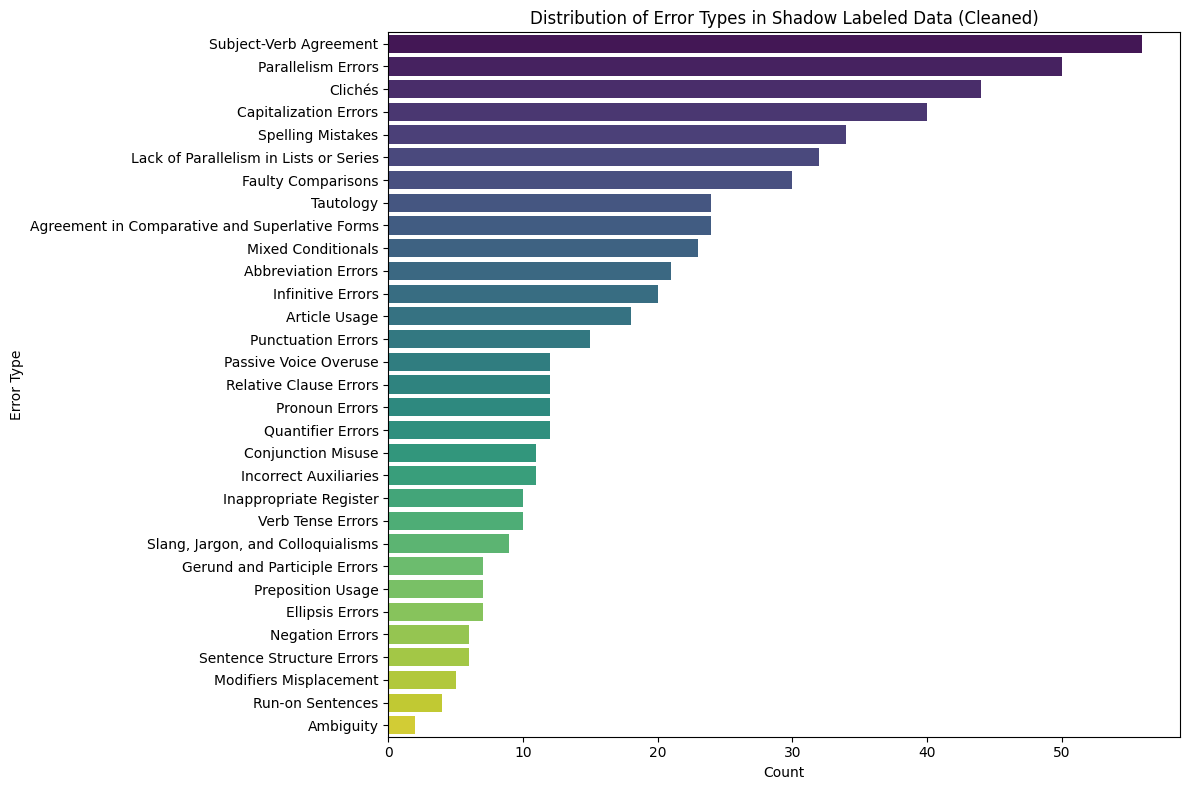

In [ ]:
# prompt: cek ada distribusi kelas error typeny

# Hitung jumlah kelas di kolom 'Error Type'
print("\nDistribusi kelas pada fitur 'Error Type' di data yang sudah dilabeli:")
print(df_final_cleaned['Error Type'].value_counts())

# Visualisasikan distribusi kelas
plt.figure(figsize=(12, 8))
sns.countplot(data=df_final_cleaned, y='Error Type', order = df_final_cleaned['Error Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Error Types in Shadow Labeled Data (Cleaned)')
plt.xlabel('Count')
plt.ylabel('Error Type')
plt.tight_layout()
plt.show()

# Cek panjang kata setiap kalimat pada dataset grammar correction

File 'jfleg_shadow_labeled_final.csv' loaded successfully.

Calculating word counts for sentences...
                             Ungrammatical Statement  ungrammatical_word_count
0                                 for not use car .                          5
1  they draw the consumers , like me , to purchas...                        35
2  it figures diana krall wearing a rolex watch a...                        52
3  since most urban areas are occupied with cars ...                        24
4  it is true that consumers preffer to buy a pro...                        52
                                    Standard English  standard_word_count
0                          not for use with a car .                     7
1  they draw in the consumers , like me , to purc...                   32
2  it features diana krall wearing a rolex watch ...                   50
3  since most urban areas are occupied with cars ...                   20
4  while it is true that consumers prefer to buy ...   

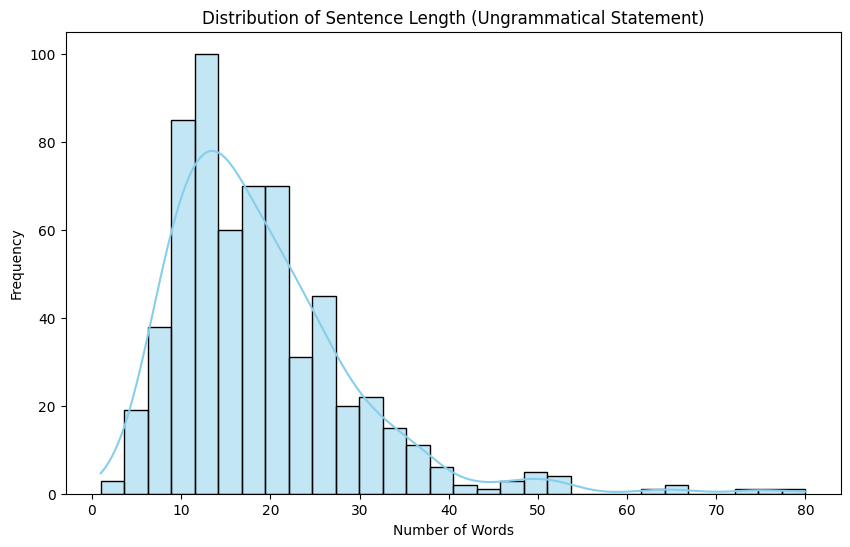

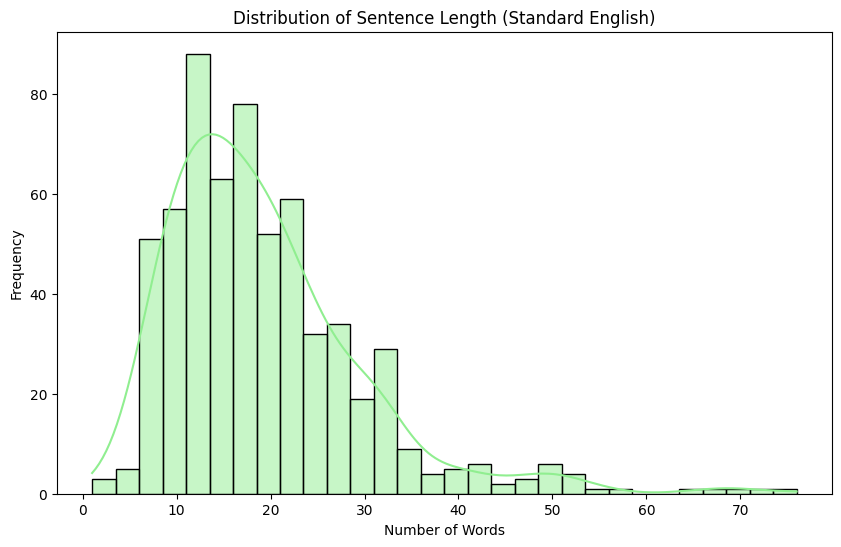


Summary statistics for sentence length (Ungrammatical Statement):
count    616.000000
mean      18.878247
std       10.465574
min        1.000000
25%       12.000000
50%       17.000000
75%       24.000000
max       80.000000
Name: ungrammatical_word_count, dtype: float64

Summary statistics for sentence length (Standard English):
count    616.000000
mean      19.188312
std       10.519835
min        1.000000
25%       12.000000
50%       17.000000
75%       24.000000
max       76.000000
Name: standard_word_count, dtype: float64


In [ ]:
# prompt: cek distribusi token pada /content/jfleg_shadow_labeled_final.csv visualisasikan aku ingin tau berapa banyak kata dalam satu kalimat

# Load the generated CSV file
try:
    df_shadow = pd.read_csv('/content/jfleg_shadow_labeled_final.csv')
    print("File 'jfleg_shadow_labeled_final.csv' loaded successfully.")
except FileNotFoundError:
    print("Error: File '/content/jfleg_shadow_labeled_final.csv' not found. Please ensure it was generated correctly.")
    exit()

# Calculate the number of tokens (words) in each sentence
# We'll use the 'Ungrammatical Statement' column as an example sentence
# You might want to do this for 'Standard English' as well or choose one
df_shadow['ungrammatical_word_count'] = df_shadow['Ungrammatical Statement'].astype(str).apply(lambda x: len(x.split()))
df_shadow['standard_word_count'] = df_shadow['Standard English'].astype(str).apply(lambda x: len(x.split()))


print("\nCalculating word counts for sentences...")
print(df_shadow[['Ungrammatical Statement', 'ungrammatical_word_count']].head())
print(df_shadow[['Standard English', 'standard_word_count']].head())


# Visualize the distribution of word counts for Ungrammatical Statements
plt.figure(figsize=(10, 6))
sns.histplot(df_shadow['ungrammatical_word_count'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sentence Length (Ungrammatical Statement)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of word counts for Standard English
plt.figure(figsize=(10, 6))
sns.histplot(df_shadow['standard_word_count'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Sentence Length (Standard English)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# You can also look at summary statistics
print("\nSummary statistics for sentence length (Ungrammatical Statement):")
print(df_shadow['ungrammatical_word_count'].describe())

print("\nSummary statistics for sentence length (Standard English):")
print(df_shadow['standard_word_count'].describe())

File 'jfleg_shadow_labeled_final.csv' loaded successfully.

Informasi dasar tentang DataFrame 'jfleg_shadow_labeled_final.csv':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ungrammatical Statement  615 non-null    object
 1   Standard English         615 non-null    object
 2   Error Type               616 non-null    object
dtypes: object(3)
memory usage: 14.6+ KB

Beberapa baris pertama dari DataFrame:
                             Ungrammatical Statement  \
0                                 for not use car .    
1  they draw the consumers , like me , to purchas...   
2  it figures diana krall wearing a rolex watch a...   
3  since most urban areas are occupied with cars ...   
4  it is true that consumers preffer to buy a pro...   

                                    Standard English  \
0                          no

/tmp/ipython-input-18-2148939272.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_shadow, y='Error Type', order = df_shadow['Error Type'].value_counts().index, palette='viridis')


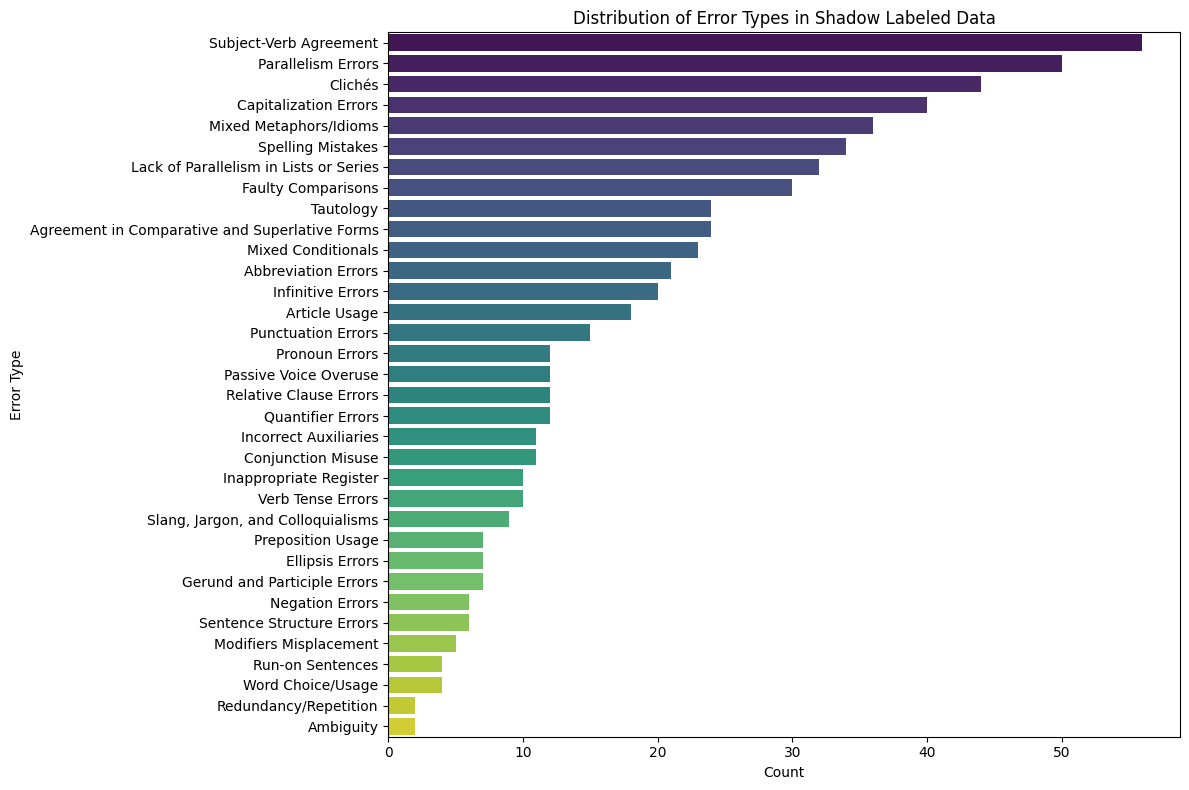


Calculating word counts for sentences...


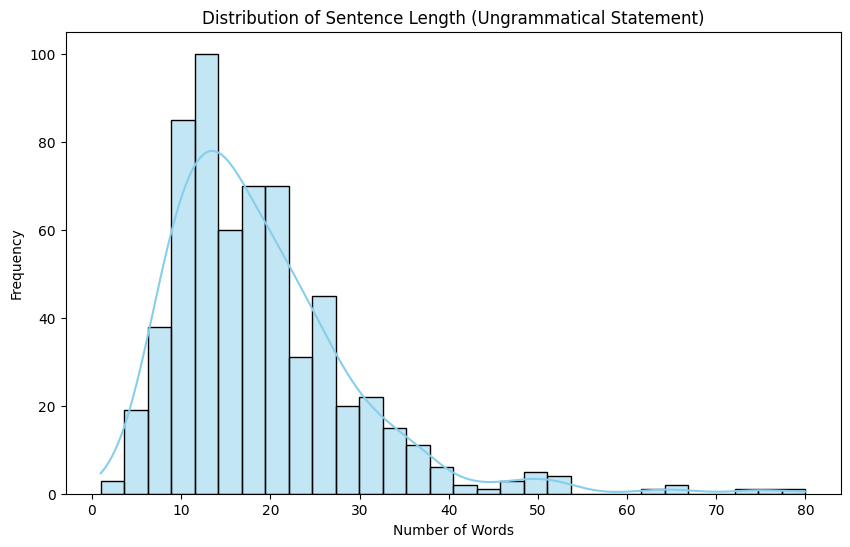

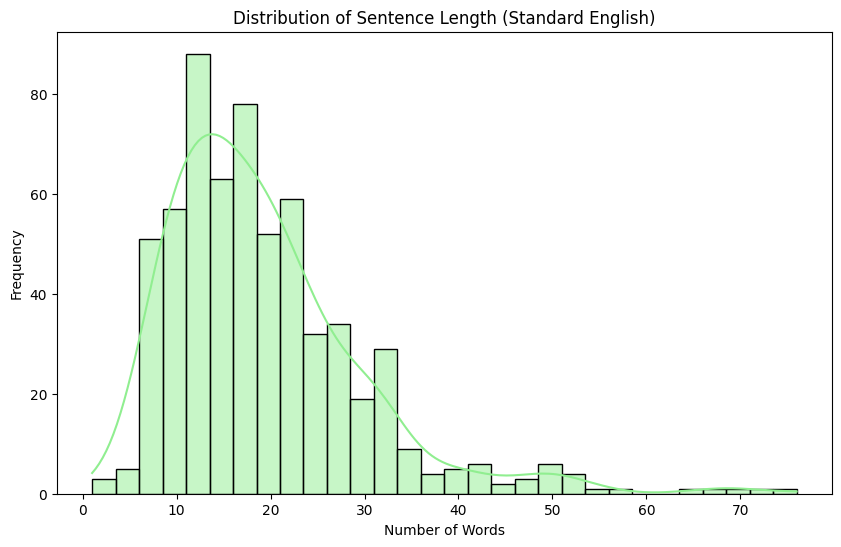


Summary statistics for sentence length (Ungrammatical Statement):
count    616.000000
mean      18.878247
std       10.465574
min        1.000000
25%       12.000000
50%       17.000000
75%       24.000000
max       80.000000
Name: ungrammatical_word_count, dtype: float64

Summary statistics for sentence length (Standard English):
count    616.000000
mean      19.188312
std       10.519835
min        1.000000
25%       12.000000
50%       17.000000
75%       24.000000
max       76.000000
Name: standard_word_count, dtype: float64


In [ ]:
# prompt: sekarang cek Grammar Correction.csv

# Muat kembali file CSV yang sudah dihasilkan
try:
    df_shadow = pd.read_csv('/content/jfleg_shadow_labeled_final.csv')
    print("File 'jfleg_shadow_labeled_final.csv' loaded successfully.")
except FileNotFoundError:
    print("Error: File '/content/jfleg_shadow_labeled_final.csv' not found. Pastikan proses sebelumnya berhasil dijalankan.")
    exit()

# Tampilkan informasi dasar tentang DataFrame
print("\nInformasi dasar tentang DataFrame 'jfleg_shadow_labeled_final.csv':")
df_shadow.info()

# Tampilkan beberapa baris pertama dari DataFrame
print("\nBeberapa baris pertama dari DataFrame:")
print(df_shadow.head())

# Cek missing values di setiap kolom
print("\nMissing values per kolom:")
print(df_shadow.isnull().sum())

# Cek duplicated rows
print("\nDuplicated rows:")
print(df_shadow.duplicated().sum())

# Hitung jumlah kelas di kolom 'Error Type'
print("\nDistribusi kelas pada fitur 'Error Type':")
print(df_shadow['Error Type'].value_counts())

# Visualisasikan distribusi kelas
plt.figure(figsize=(12, 8))
sns.countplot(data=df_shadow, y='Error Type', order = df_shadow['Error Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Error Types in Shadow Labeled Data')
plt.xlabel('Count')
plt.ylabel('Error Type')
plt.tight_layout()
plt.show()

# Hitung dan visualisasikan distribusi panjang kalimat (kata)
df_shadow['ungrammatical_word_count'] = df_shadow['Ungrammatical Statement'].astype(str).apply(lambda x: len(x.split()))
df_shadow['standard_word_count'] = df_shadow['Standard English'].astype(str).apply(lambda x: len(x.split()))

print("\nCalculating word counts for sentences...")

# Visualize the distribution of word counts for Ungrammatical Statements
plt.figure(figsize=(10, 6))
sns.histplot(df_shadow['ungrammatical_word_count'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sentence Length (Ungrammatical Statement)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of word counts for Standard English
plt.figure(figsize=(10, 6))
sns.histplot(df_shadow['standard_word_count'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Sentence Length (Standard English)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for sentence length
print("\nSummary statistics for sentence length (Ungrammatical Statement):")
print(df_shadow['ungrammatical_word_count'].describe())

print("\nSummary statistics for sentence length (Standard English):")
print(df_shadow['standard_word_count'].describe())

# Definisikan Seleksi kelas error type yang relevan untuk speech to text

In [ ]:
selected_errors = [

    'Verb Tense Errors',
    'Subject-Verb Agreement',
    'Preposition Usage',
    'Article Usage',
    'Pronoun Errors',
    'Word Choice/Usage',
    'Relative Clause Errors',
    'Incorrect Auxiliaries',
    'Gerund and Participle Errors',
    'Infinitive Errors',
    'Sentence Fragments',
    'Sentence Structure Errors',
    'Passive Voice Overuse',
    'Redundancy/Repetition',
    'Modifiers Misplacement'
]

# Menggabungkan dataset yang sudah tershadow labeling dengan dataset terlabeli tampa random oversampling dan Cek Distribusi kelas error typenya

Penggabungan dataset selesai.
Ukuran dataset Grammar Correction asli: 2018
Ukuran dataset JFLEG yang dilabeli (bersih): 574
Ukuran dataset gabungan: 2592

Distribusi Error Type pada dataset gabungan:
Error Type
Subject-Verb Agreement                            156
Spelling Mistakes                                 134
Article Usage                                     118
Verb Tense Errors                                 110
Sentence Structure Errors                         109
Preposition Usage                                 102
Parallelism Errors                                 99
Clichés                                            92
Lack of Parallelism in Lists or Series             82
Capitalization Errors                              80
Faulty Comparisons                                 79
Punctuation Errors                                 75
Tautology                                          74
Agreement in Comparative and Superlative Forms     73
Mixed Conditionals               

/tmp/ipython-input-14-1527682771.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_combined, y='Error Type', order = df_combined['Error Type'].value_counts().index, palette='viridis')


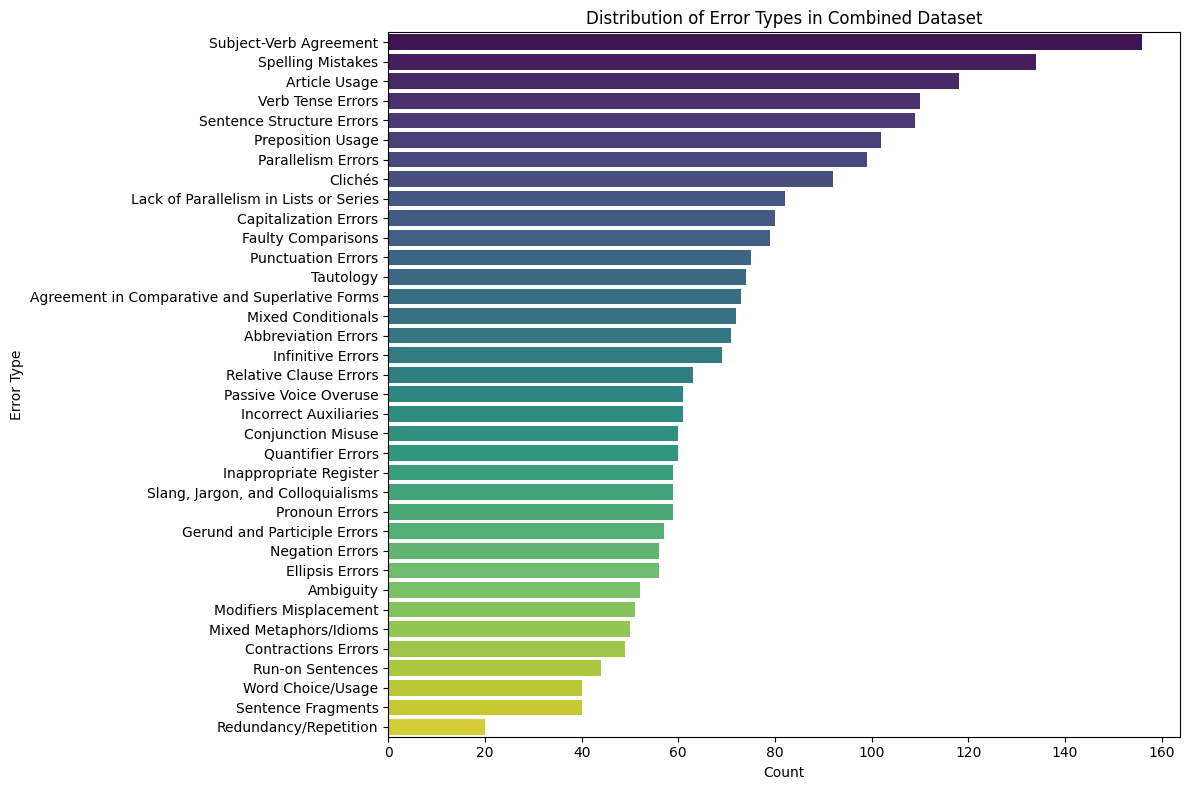

In [ ]:
# Muat data Grammar Correction.csv asli
df_gc = pd.read_csv('Grammar Correction.csv')

# Muat data jfleg_shadow_labeled_final.csv yang sudah bersih (setelah penghapusan baris dengan '/')
df_jfleg_labeled_cleaned = pd.read_csv('jfleg_shadow_labeled_final_cleaned.csv')

# Pastikan kedua DataFrame memiliki kolom yang sama sebelum digabungkan
# Kolom yang relevan adalah 'Ungrammatical Statement', 'Standard English', dan 'Error Type'
# Kolom lain yang mungkin ada di salah satu file (misalnya, kolom indeks dari oversampling) tidak perlu disertakan.
# Pastikan tipe data cocok (misalnya, string)

# Ambil kolom yang diperlukan dari df_gc
df_gc_subset = df_gc[['Ungrammatical Statement', 'Standard English', 'Error Type']].copy()

# Ambil kolom yang diperlukan dari df_jfleg_labeled_cleaned
df_jfleg_subset = df_jfleg_labeled_cleaned[['Ungrammatical Statement', 'Standard English', 'Error Type']].copy()

# Gabungkan kedua DataFrame secara vertikal (stack)
df_combined = pd.concat([df_gc_subset, df_jfleg_subset], ignore_index=True)

print("Penggabungan dataset selesai.")
print(f"Ukuran dataset Grammar Correction asli: {len(df_gc_subset)}")
print(f"Ukuran dataset JFLEG yang dilabeli (bersih): {len(df_jfleg_subset)}")
print(f"Ukuran dataset gabungan: {len(df_combined)}")

# Cek kembali distribusi 'Error Type' pada dataset gabungan
print("\nDistribusi Error Type pada dataset gabungan:")
print(df_combined['Error Type'].value_counts())

# Opsional: Simpan dataset gabungan ke file CSV baru
df_combined.to_csv('Grammar_Correction_Combined.csv', index=False)
print("\nDataset gabungan disimpan ke 'Grammar_Correction_Combined.csv'")

# Visualisasikan distribusi kelas pada dataset gabungan
plt.figure(figsize=(12, 8))
sns.countplot(data=df_combined, y='Error Type', order = df_combined['Error Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Error Types in Combined Dataset')
plt.xlabel('Count')
plt.ylabel('Error Type')
plt.tight_layout()
plt.show()

## Seleksi error type dan cek distribusi kelasnya


Dataset setelah seleksi berdasarkan selected_errors:
Ukuran dataset setelah seleksi: 1116

Distribusi Error Type pada dataset yang telah diseleksi:
Error Type
Subject-Verb Agreement          156
Article Usage                   118
Verb Tense Errors               110
Sentence Structure Errors       109
Preposition Usage               102
Infinitive Errors                69
Relative Clause Errors           63
Passive Voice Overuse            61
Incorrect Auxiliaries            61
Pronoun Errors                   59
Gerund and Participle Errors     57
Modifiers Misplacement           51
Word Choice/Usage                40
Sentence Fragments               40
Redundancy/Repetition            20
Name: count, dtype: int64

Dataset yang telah diseleksi disimpan ke 'Grammar_Correction_Selected_Errors.csv'


/tmp/ipython-input-15-90550332.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected, y='Error Type', order = df_selected['Error Type'].value_counts().index, palette='viridis')


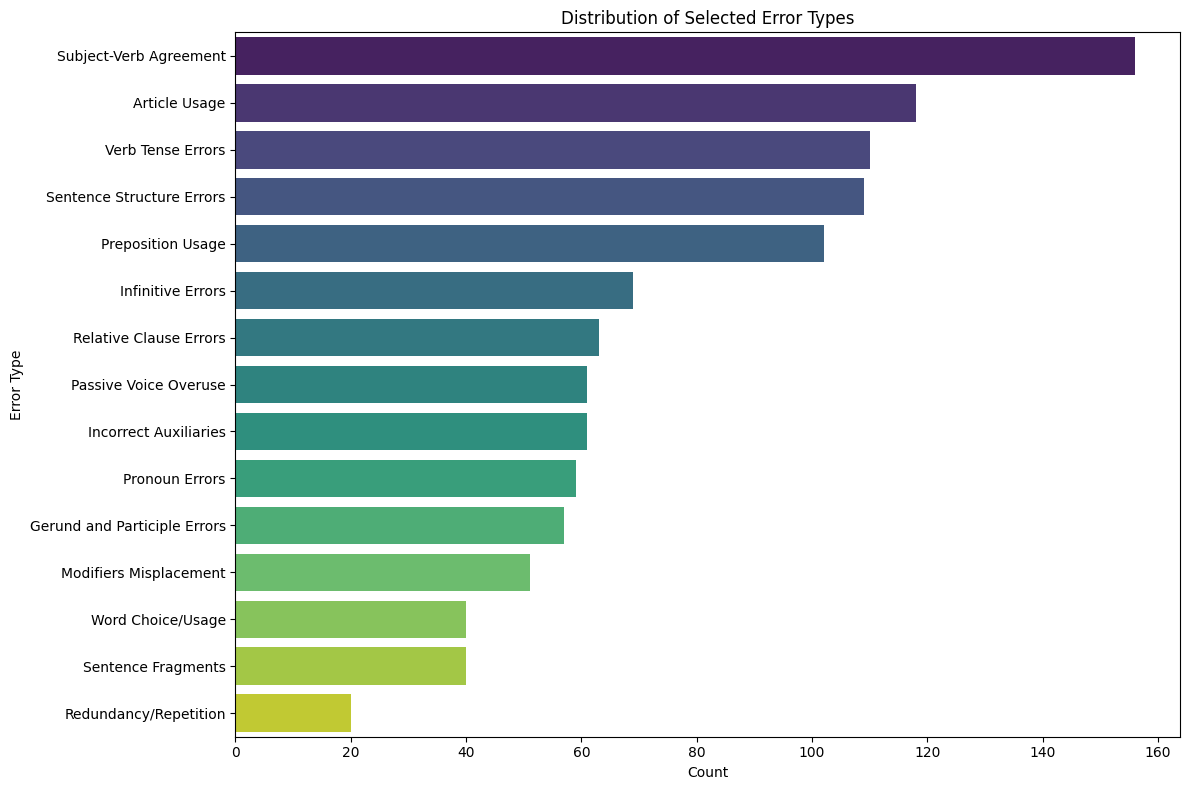

In [ ]:
# Melakukan seleksi berdasarkan selected_errors
df_selected = df_combined[df_combined['Error Type'].isin(selected_errors)].copy()

print("\nDataset setelah seleksi berdasarkan selected_errors:")
print(f"Ukuran dataset setelah seleksi: {len(df_selected)}")

# Cek kembali distribusi 'Error Type' pada dataset yang telah diseleksi
print("\nDistribusi Error Type pada dataset yang telah diseleksi:")
print(df_selected['Error Type'].value_counts())

# Opsional: Simpan dataset yang telah diseleksi ke file CSV baru
df_selected.to_csv('Grammar_Correction_Selected_Errors.csv', index=False)
print("\nDataset yang telah diseleksi disimpan ke 'Grammar_Correction_Selected_Errors.csv'")

# Visualisasikan distribusi kelas pada dataset yang telah diseleksi
plt.figure(figsize=(12, 8))
sns.countplot(data=df_selected, y='Error Type', order = df_selected['Error Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Selected Error Types')
plt.xlabel('Count')
plt.ylabel('Error Type')
plt.tight_layout()
plt.show()

# Augmentasi data sebanyak 5 untuk setiap kelas error type yang dimungkinkan untuk library nlaug

In [ ]:
import pandas as pd
import spacy
import random
from tqdm import tqdm
import warnings
import re

# Menonaktifkan peringatan yang tidak krusial
warnings.filterwarnings('ignore')

# Import augmenters dari nlaug
try:
    import nlaug.augmenter.word as naw
    import nlaug.augmenter.sentence as nas
    NLAUG_AVAILABLE = True
except ImportError:
    NLAUG_AVAILABLE = False
    print("Peringatan: nlaug tidak ditemukan, fungsionalitas augmentasi akan terbatas.")

# --- 1. KONFIGURASI DAN SETUP ---

# Muat model spaCy
try:
    nlp = spacy.load("en_core_web_sm")
    print("Model spaCy 'en_core_web_sm' berhasil dimuat.")
except IOError:
    print("Model spaCy 'en_core_web_sm' belum terinstal. Jalankan sel instalasi di atas.")
    exit()

# Konfigurasi file dan parameter
SOURCE_FILENAME = 'Grammar_Correction_Combined.csv'
OUTPUT_FILENAME = 'augmentasi_no_label.csv'
AUGMENTATIONS_PER_SENTENCE = 5

# --- 2. FUNGSI-FUNGSI AUGMENTASI (DIPERBAIKI) ---

def clean_spacing(text: str) -> str:
    """Fungsi helper untuk membersihkan spasi berlebih sebelum tanda baca."""
    # Menghilangkan spasi sebelum titik, koma, tanda tanya, tanda seru
    text = re.sub(r'\s+([.,?!])', r'\1', text)
    # Memastikan ada satu spasi setelah tanda baca (jika diikuti huruf)
    text = re.sub(r'([.,?!])([a-zA-Z])', r'\1 \2', text)
    return text.strip()

def augment_verb_tense(doc: spacy.tokens.Doc) -> str:
    """Mengubah tense dari kata kerja pertama yang ditemukan."""
    # >> PERBAIKAN LOGIKA DIMULAI DI SINI <<
    token_texts = [token.text for token in doc]
    verbs = [i for i, token in enumerate(doc) if token.pos_ == "VERB"]
    if verbs:
        idx_to_change = random.choice(verbs)
        original_verb = doc[idx_to_change].text

        # Logika sederhana untuk mengubah tense
        if original_verb.endswith("ed"):
            new_verb = doc[idx_to_change].lemma_
        elif original_verb.endswith("s"):
             new_verb = doc[idx_to_change].lemma_
        else:
            new_verb = original_verb + "s"

        if new_verb != original_verb:
            token_texts[idx_to_change] = new_verb
            return clean_spacing(" ".join(token_texts))
    return doc.text

def augment_sva(doc: spacy.tokens.Doc) -> str:
    """Mengubah Subject-Verb Agreement."""
    token_texts = [token.text for token in doc]
    for token in doc:
        if token.dep_ == "ROOT" and token.pos_ == "VERB":
            if any(child.dep_ == "nsubj" for child in token.children):
                if token.text.endswith('s'):
                    token_texts[token.i] = token.lemma_
                else:
                    token_texts[token.i] = token.lemma_ + 's'
                return clean_spacing(" ".join(token_texts))
    return doc.text

def augment_preposition(doc: spacy.tokens.Doc) -> str:
    """Mengganti preposisi dengan preposisi acak lain."""
    token_texts = [token.text for token in doc]
    prep_map = {'on': 'in', 'in': 'at', 'at': 'on', 'for': 'to', 'to': 'for', 'with': 'by'}
    prepositions = [i for i, token in enumerate(doc) if token.pos_ == "ADP"]
    if prepositions:
        idx_to_change = random.choice(prepositions)
        original_prep = doc[idx_to_change].text.lower()
        if original_prep in prep_map:
            token_texts[idx_to_change] = prep_map[original_prep]
            return clean_spacing(" ".join(token_texts))
    return doc.text

def augment_article(doc: spacy.tokens.Doc) -> str:
    """Menghapus atau mengganti artikel (a, an, the)."""
    token_texts = [token.text for token in doc]
    articles = [i for i, token in enumerate(doc) if token.pos_ == "DET" and token.text.lower() in ['a', 'an', 'the']]
    if articles:
        idx_to_change = random.choice(articles)
        # 50% kesempatan untuk menghapus, 50% untuk mengganti
        if random.random() < 0.5:
            del token_texts[idx_to_change]
        else:
            token_texts[idx_to_change] = random.choice(['a', 'the']) # Ganti dengan a/the saja
        return clean_spacing(" ".join(token_texts))
    return doc.text

def augment_redundancy(doc: spacy.tokens.Doc) -> str:
    """Menambahkan redundansi dengan mengulang kata benda atau kata sifat."""
    token_texts = [token.text for token in doc]
    candidates = [i for i, token in enumerate(doc) if token.pos_ in ["NOUN", "ADJ"]]
    if candidates:
        idx_to_repeat = random.choice(candidates)
        token_texts.insert(idx_to_repeat + 1, token_texts[idx_to_repeat])
        return clean_spacing(" ".join(token_texts))
    return doc.text

# Fungsi yang menggunakan NL-Augmenter
def augment_word_choice(text: str) -> str:
    if not NLAUG_AVAILABLE: return text
    try:
        augmenter = naw.WordNetAug(action='substitute')
        return augmenter.augment(text)
    except Exception: return text

def augment_sentence_structure(text: str) -> str:
    if not NLAUG_AVAILABLE: return text
    try:
        augmenter = nas.BackTranslationAug(from_model_name='Helsinki-NLP/opus-mt-en-de', to_model_name='Helsinki-NLP/opus-mt-de-en')
        return augmenter.augment(text)
    except Exception: return text

# --- 3. PROSES AUGMENTASI UTAMA ---

def main():
    try:
        df = pd.read_csv(SOURCE_FILENAME)
        print(f"Dataset '{SOURCE_FILENAME}' berhasil dimuat. Jumlah baris: {len(df)}")
    except FileNotFoundError:
        print(f"ERROR: File '{SOURCE_FILENAME}' tidak ditemukan.")
        return

    augmenter_mapping = {
        "Verb Tense Errors": augment_verb_tense,
        "Subject-Verb Agreement": augment_sva,
        "Preposition Usage": augment_preposition,
        "Article Usage": augment_article,
        "Redundancy/Repetition": augment_redundancy,
        "Word Choice/Usage": augment_word_choice,
        "Sentence Structure Errors": augment_sentence_structure,
    }

    supported_types = list(augmenter_mapping.keys())
    print(f"\nJenis error yang didukung untuk augmentasi: {supported_types}")

    results = []
    df_filtered = df[df['Error Type'].isin(supported_types)]
    print(f"Memproses {len(df_filtered)} baris dengan Error Type yang didukung...\n")

    tqdm.pandas(desc="Mengaugmentasi data")

    for index, row in tqdm(df_filtered.iterrows(), total=len(df_filtered)):
        original_ungrammatical = row['Ungrammatical Statement']
        original_standard = row['Standard English']
        error_type = row['Error Type']

        augmenter_func = augmenter_mapping.get(error_type)
        is_spacy_func = error_type not in ["Word Choice/Usage", "Sentence Structure Errors"]

        # Hanya proses dengan spaCy jika diperlukan
        doc = nlp(original_ungrammatical) if is_spacy_func else None

        for _ in range(AUGMENTATIONS_PER_SENTENCE):
            try:
                if is_spacy_func:
                    augmented_text = augmenter_func(doc)
                else:
                    augmented_text = augmenter_func(original_ungrammatical)

                if augmented_text.lower() != original_ungrammatical.lower():
                    results.append({
                        'Ungrammatical Statement': augmented_text,
                        'Standard English': original_standard
                    })
            except Exception as e:
                # Menangkap error lain yang mungkin terjadi di dalam loop
                # print(f"Gagal melakukan augmentasi untuk baris {index}: {e}")
                pass # Lewati jika ada error pada satu augmentasi

    if not results:
        print("\nTidak ada data baru yang dihasilkan dari proses augmentasi.")
        return

    df_final = pd.DataFrame(results)
    df_final.drop_duplicates(inplace=True)
    df_final.to_csv(OUTPUT_FILENAME, index=False)

    print(f"\nProses augmentasi selesai!")
    print(f"{len(df_final)} baris data augmentasi unik telah disimpan ke '{OUTPUT_FILENAME}'.")
    print("\nContoh hasil:")
    print(df_final.head())


if __name__ == '__main__':
    main()

Peringatan: nlaug tidak ditemukan, fungsionalitas augmentasi akan terbatas.
Model spaCy 'en_core_web_sm' berhasil dimuat.
Dataset 'Grammar_Correction_Combined.csv' berhasil dimuat. Jumlah baris: 2592

Jenis error yang didukung untuk augmentasi: ['Verb Tense Errors', 'Subject-Verb Agreement', 'Preposition Usage', 'Article Usage', 'Redundancy/Repetition', 'Word Choice/Usage', 'Sentence Structure Errors']
Memproses 655 baris dengan Error Type yang didukung...



100%|██████████| 655/655 [00:06<00:00, 103.53it/s]


Proses augmentasi selesai!
610 baris data augmentasi unik telah disimpan ke 'augmentasi_no_label.csv'.

Contoh hasil:
                 Ungrammatical Statement                      Standard English
0            I go to the store everyday.           I go to the store everyday.
5   They was playings soccer last night.  They were playing soccer last night.
10       She have complete her homework.       She has completed her homework.
15           He do n't knows the answer.           He doesn't know the answer.
20            The sun rises in the east.            The sun rises in the east.


# Cek data yang ter-augmentasi apakah ada yang duplikat

In [ ]:

import pandas as pd

# Muat kembali file CSV yang sudah dihasilkan
try:
    df_augmentasi = pd.read_csv('/content/augmentasi_no_label.csv')
    print("File '/content/augmentasi_no_label.csv' loaded successfully.")
except FileNotFoundError:
    print("Error: File '/content/augmentasi_no_label.csv' not found. Pastikan proses sebelumnya berhasil dijalankan.")
    exit()

# Cek duplikasi baris
print("\nJumlah baris duplikat pada file /content/augmentasi_no_label.csv:")
print(df_augmentasi.duplicated().sum())

# Cek apakah ada nilai yang sama persis antara 'Ungrammatical Statement' dan 'Standard English'
# Pastikan kedua kolom bertipe string dan tidak ada NaN yang mengganggu perbandingan
df_augmentasi['Ungrammatical Statement'] = df_augmentasi['Ungrammatical Statement'].astype(str)
df_augmentasi['Standard English'] = df_augmentasi['Standard English'].astype(str)

same_statements_count = (df_augmentasi['Ungrammatical Statement'] == df_augmentasi['Standard English']).sum()

print("\nJumlah baris di mana 'Ungrammatical Statement' sama persis dengan 'Standard English':")
print(same_statements_count)

if same_statements_count > 0:
    print("\nContoh baris di mana 'Ungrammatical Statement' sama persis dengan 'Standard English':")
    print(df_augmentasi[df_augmentasi['Ungrammatical Statement'] == df_augmentasi['Standard English']].head())
else:
    print("\nTidak ada baris di mana 'Ungrammatical Statement' sama persis dengan 'Standard English'.")

# Tampilkan informasi dasar dan beberapa baris untuk verifikasi
print("\nInformasi dasar tentang DataFrame 'augmentasi_no_label.csv':")
df_augmentasi.info()

print("\nBeberapa baris pertama dari DataFrame 'augmentasi_no_label.csv':")
print(df_augmentasi.head())

File '/content/augmentasi_no_label.csv' loaded successfully.

Jumlah baris duplikat pada file /content/augmentasi_no_label.csv:
0

Jumlah baris di mana 'Ungrammatical Statement' sama persis dengan 'Standard English':
109

Contoh baris di mana 'Ungrammatical Statement' sama persis dengan 'Standard English':
                   Ungrammatical Statement  \
0              I go to the store everyday.   
4               The sun rises in the east.   
7        She will go to the party tonight.   
8           They watch the movie together.   
10  She thinks she can finish the project.   

                          Standard English  
0              I go to the store everyday.  
4               The sun rises in the east.  
7        She will go to the party tonight.  
8           They watch the movie together.  
10  She thinks she can finish the project.  

Informasi dasar tentang DataFrame 'augmentasi_no_label.csv':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data column

# yang duplikat dihapus

In [ ]:

# Filter out rows where the two columns are identical
df_augmentasi_filtered = df_augmentasi[df_augmentasi['Ungrammatical Statement'] != df_augmentasi['Standard English']].copy()

print(f"\nUkuran DataFrame sebelum dihapus baris dengan 'Ungrammatical Statement' == 'Standard English': {len(df_augmentasi)}")
print(f"Ukuran DataFrame setelah dihapus baris dengan 'Ungrammatical Statement' == 'Standard English': {len(df_augmentasi_filtered)}")

# Opsional: Simpan DataFrame yang sudah bersih ke file CSV baru
df_augmentasi_filtered.to_csv('augmentasi_no_label_cleaned.csv', index=False)
print("\nDataFrame yang sudah bersih disimpan ke 'augmentasi_no_label_cleaned.csv'")


Ukuran DataFrame sebelum dihapus baris dengan 'Ungrammatical Statement' == 'Standard English': 610
Ukuran DataFrame setelah dihapus baris dengan 'Ungrammatical Statement' == 'Standard English': 501

DataFrame yang sudah bersih disimpan ke 'augmentasi_no_label_cleaned.csv'


# Pseudo labeling untuk data yang diaugmentasi dan cek distribusi skor confidencenya

Dataset augmentasi dimuat: 610 baris.
Objek 'pipeline' dan 'label_encoder' model LightGBM ditemukan di memori.

Melakukan prediksi pada 610 data augmentasi...
Prediksi selesai.

Hasil shadow labeling disimpan ke 'augmentasi_shadow_labeled.csv'

Contoh hasil:
                Ungrammatical Statement                      Standard English  \
0           I go to the store everyday.           I go to the store everyday.   
1  They was playings soccer last night.  They were playing soccer last night.   
2       She have complete her homework.       She has completed her homework.   
3           He do n't knows the answer.           He doesn't know the answer.   
4            The sun rises in the east.            The sun rises in the east.   

          Error Type  Confidence Score  
0  Verb Tense Errors          0.998341  
1  Verb Tense Errors          0.999065  
2  Verb Tense Errors          0.998371  
3  Verb Tense Errors          0.996218  
4  Verb Tense Errors          0.999190  

Distrib

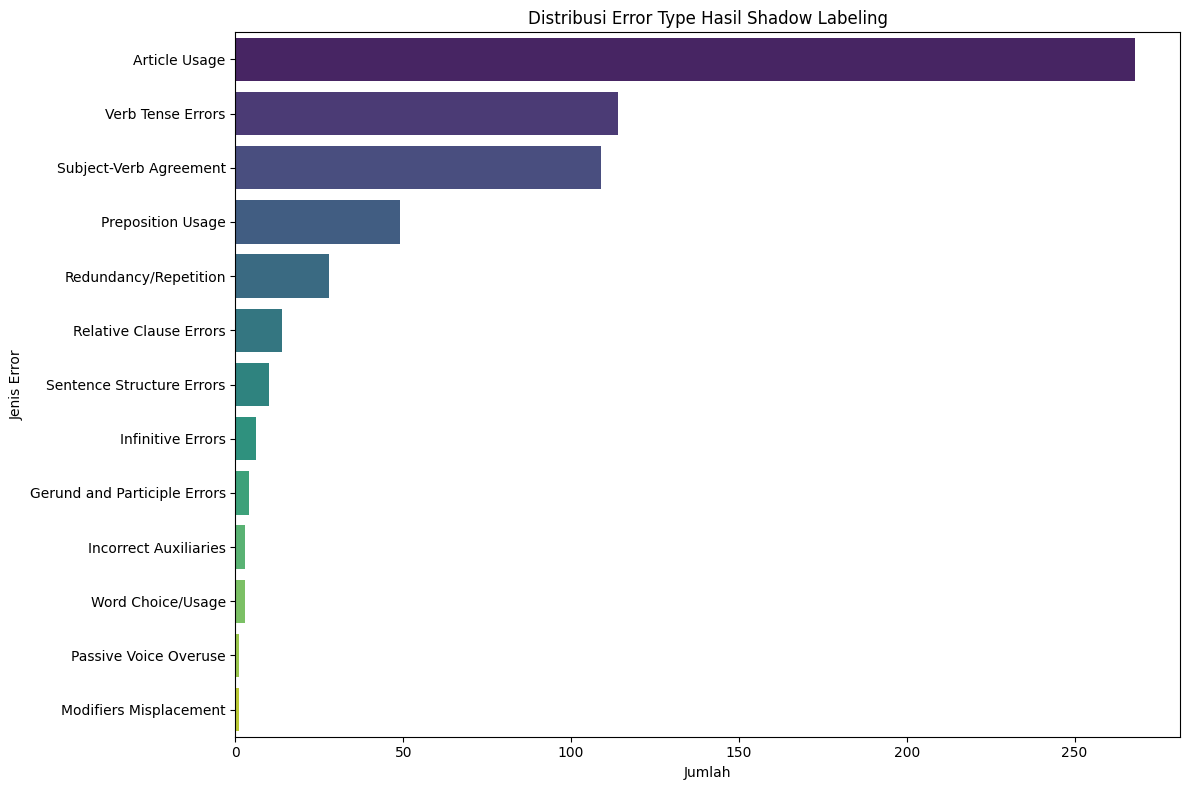


Statistik Deskriptif untuk Confidence Score:
count    610.000000
mean       0.938619
std        0.133298
min        0.347484
25%        0.966909
50%        0.999013
75%        0.999917
max        0.999999
Name: Confidence Score, dtype: float64


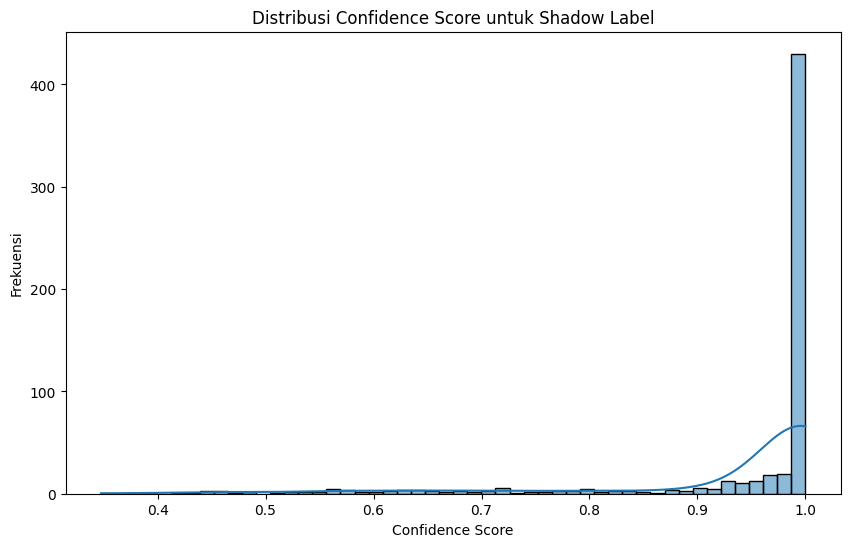

In [ ]:
# Menonaktifkan peringatan yang tidak krusial
import warnings
warnings.filterwarnings('ignore')

# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMClassifier

# --- 1. FUNGSI UNTUK MEMUAT ATAU MELATIH ULANG MODEL ---
# Dibungkus dalam fungsi agar lebih rapi dan bisa digunakan kembali

def load_or_train_model(training_data_path: str):
    """
    Mengecek apakah model 'pipeline' sudah ada di memori.
    Jika tidak, fungsi ini akan melatih model baru dari file CSV yang diberikan.
    """
    # Cek di scope global apakah variabel pipeline sudah ada
    if 'pipeline' in globals() and 'label_encoder' in globals():
        print("Objek 'pipeline' dan 'label_encoder' model LightGBM ditemukan di memori.")
        return globals()['pipeline'], globals()['label_encoder']

    print("\nWARNING: Objek model tidak ditemukan. Melatih ulang model dari file sumber...")

    try:
        df_train_source = pd.read_csv(training_data_path)
        print(f"Melatih model dengan data dari '{training_data_path}': {len(df_train_source)} baris.")

        features = ['Ungrammatical Statement', 'Standard English']
        target = 'Error Type'

        # Inisialisasi dan fit LabelEncoder
        le = LabelEncoder()
        le.fit(df_train_source[target])

        # Definisikan preprocessor, pastikan konsisten dengan pelatihan sebelumnya
        preprocessor = ColumnTransformer(
            transformers=[
                ('text_ungrammatical', TfidfVectorizer(max_features=3000, stop_words='english'), 'Ungrammatical Statement'),
                ('text_standard', TfidfVectorizer(max_features=3000, stop_words='english'), 'Standard English')
            ],
            remainder='passthrough'
        )

        # Definisikan pipeline
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', LGBMClassifier(random_state=42, verbose=-1))
        ])

        # Latih model
        y_train_encoded = le.transform(df_train_source[target])
        pipe.fit(df_train_source[features], y_train_encoded)
        print("Model LightGBM berhasil dilatih ulang.")
        return pipe, le

    except FileNotFoundError:
        print(f"ERROR: File latih '{training_data_path}' tidak ditemukan. Proses berhenti.")
        exit()
    except Exception as e:
        print(f"ERROR saat melatih ulang model: {e}. Proses berhenti.")
        exit()


# --- 2. PERSIAPAN DATA DAN EKSEKUSI PSEUDO LABELING ---

# Muat data augmentasi yang akan dilabeli
try:
    df_augmentasi = pd.read_csv('augmentasi_no_label.csv') # Menggunakan nama file dari proses sebelumnya
    print(f"Dataset augmentasi dimuat: {len(df_augmentasi)} baris.")
except FileNotFoundError:
    print("Pastikan file 'augmentasi_no_label.csv' ada di direktori yang sama.")
    exit()

# >> PERBAIKAN: Memastikan nama kolom sesuai dengan yang diharapkan model <<
# Ini membuat kode lebih fleksibel jika nama kolom di CSV adalah 'input'/'target'
column_rename_map = {'input': 'Ungrammatical Statement', 'target': 'Standard English'}
df_augmentasi.rename(columns=column_rename_map, inplace=True, errors='ignore')

# Verifikasi kolom yang dibutuhkan ada
required_features = ['Ungrammatical Statement', 'Standard English']
if not all(col in df_augmentasi.columns for col in required_features):
    print(f"ERROR: File augmentasi harus memiliki kolom {required_features}.")
    exit()

# Panggil fungsi untuk mendapatkan model yang siap pakai
# >> PERBAIKAN: Menggunakan file '...Combined.csv' yang lebih pasti ada <<
training_file = 'Grammar_Correction_Combined.csv'
pipeline, label_encoder = load_or_train_model(training_file)


# Lakukan prediksi (shadow labeling)
print(f"\nMelakukan prediksi pada {len(df_augmentasi)} data augmentasi...")
predicted_probabilities = pipeline.predict_proba(df_augmentasi[required_features])
predicted_class_indices = np.argmax(predicted_probabilities, axis=1)
max_probs = np.max(predicted_probabilities, axis=1)

# Tambahkan hasil prediksi ke dataframe
df_augmentasi['Error Type'] = label_encoder.inverse_transform(predicted_class_indices)
df_augmentasi['Confidence Score'] = max_probs
print("Prediksi selesai.")


# --- 3. MENYIMPAN DAN MENGANALISIS HASIL ---

output_filename = 'augmentasi_shadow_labeled.csv'
df_augmentasi.to_csv(output_filename, index=False)
print(f"\nHasil shadow labeling disimpan ke '{output_filename}'")
print("\nContoh hasil:")
print(df_augmentasi.head())

# Analisis Distribusi Error Type
print("\nDistribusi Error Type pada data hasil shadow labeling:")
print(df_augmentasi['Error Type'].value_counts())

# Visualisasi Distribusi Error Type
plt.figure(figsize=(12, 8))
sns.countplot(data=df_augmentasi, y='Error Type', order=df_augmentasi['Error Type'].value_counts().index, palette='viridis')
plt.title('Distribusi Error Type Hasil Shadow Labeling')
plt.xlabel('Jumlah')
plt.ylabel('Jenis Error')
plt.tight_layout()
plt.show()

# Analisis Distribusi Confidence Score
print("\nStatistik Deskriptif untuk Confidence Score:")
print(df_augmentasi['Confidence Score'].describe())

# Visualisasi Distribusi Confidence Score
plt.figure(figsize=(10, 6))
sns.histplot(df_augmentasi['Confidence Score'], bins=50, kde=True)
plt.title('Distribusi Confidence Score untuk Shadow Label')
plt.xlabel('Confidence Score')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
df_selected = pd.read_csv('Grammar_Correction_Selected_Errors.csv')
df_selected.head()

,Ungrammatical Statement,Standard English,Error Type
0,I goes to the store everyday.,I go to the store everyday.,Verb Tense Errors
1,They was playing soccer last night.,They were playing soccer last night.,Verb Tense Errors
2,She have completed her homework.,She has completed her homework.,Verb Tense Errors
3,He don't know the answer.,He doesn't know the answer.,Verb Tense Errors
4,The sun rise in the east.,The sun rises in the east.,Verb Tense Errors


In [ ]:
df_augmentasi_filtered = pd.read_csv('/content/augmentasi_shadow_labeled.csv')
df_augmentasi_filtered.head()

,Ungrammatical Statement,Standard English,Error Type,Confidence Score
0,I go to the store everyday.,I go to the store everyday.,Verb Tense Errors,0.998341
1,They was playings soccer last night.,They were playing soccer last night.,Verb Tense Errors,0.999065
2,She have complete her homework.,She has completed her homework.,Verb Tense Errors,0.998371
3,He do n't knows the answer.,He doesn't know the answer.,Verb Tense Errors,0.996218
4,The sun rises in the east.,The sun rises in the east.,Verb Tense Errors,0.999190


# Setelah di pseudo labeling, gabungkan dengan dataset utama dan cek distribusi kelas error type

Penggabungan dataset 'Grammar_Correction_Selected_Errors.csv' dan hasil augmentasi selesai.
Ukuran dataset Selected Errors asli: 1116
Ukuran dataset Augmentasi yang dilabeli dan dibersihkan: 610
Ukuran dataset gabungan akhir: 1726

Dataset gabungan akhir disimpan ke '/content/Grammar_Correction_Selected_Errors.csv'

Distribusi Error Type pada dataset gabungan akhir:
Error Type
Article Usage                   386
Subject-Verb Agreement          265
Verb Tense Errors               224
Preposition Usage               151
Sentence Structure Errors       119
Relative Clause Errors           77
Infinitive Errors                75
Incorrect Auxiliaries            64
Passive Voice Overuse            62
Gerund and Participle Errors     61
Pronoun Errors                   59
Modifiers Misplacement           52
Redundancy/Repetition            48
Word Choice/Usage                43
Sentence Fragments               40
Name: count, dtype: int64


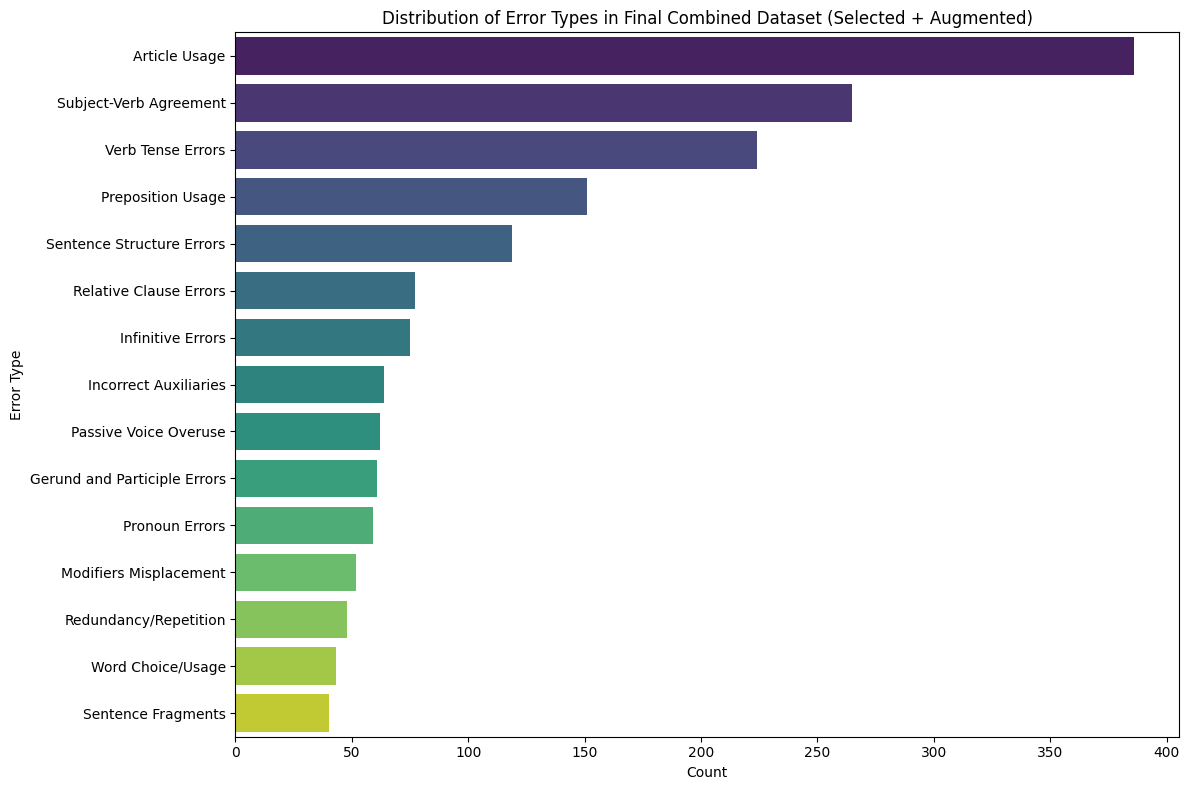

In [ ]:
# Gabungkan df_selected dengan df_augmentasi
# Pastikan kedua DataFrame memiliki kolom yang sama sebelum digabungkan
# Kolom yang relevan adalah 'Ungrammatical Statement', 'Standard English', dan 'Error Type'
# df_augmentasi_filtered sudah punya kolom-kolom ini

# Ambil kolom yang diperlukan dari df_selected
df_selected_subset = df_selected[['Ungrammatical Statement', 'Standard English', 'Error Type']].copy()

# Ambil kolom yang diperlukan dari df_augmentasi_filtered (hasil shadow labeling)
# Kita hanya perlu 3 kolom utama, kolom Confidence Score tidak perlu digabungkan
# FIX: Use the correct variable name loaded from the shadow labeled file
df_augmentasi_subset = df_augmentasi_filtered[['Ungrammatical Statement', 'Standard English', 'Error Type']].copy()

# Gabungkan kedua DataFrame secara vertikal (stack)
df_final_combined = pd.concat([df_selected_subset, df_augmentasi_subset], ignore_index=True)

print("Penggabungan dataset 'Grammar_Correction_Selected_Errors.csv' dan hasil augmentasi selesai.")
print(f"Ukuran dataset Selected Errors asli: {len(df_selected_subset)}")
print(f"Ukuran dataset Augmentasi yang dilabeli dan dibersihkan: {len(df_augmentasi_subset)}")
print(f"Ukuran dataset gabungan akhir: {len(df_final_combined)}")

# Opsional: Simpan dataset gabungan akhir ke file CSV baru
output_final_filename = '/content/Grammar_Correction_Selected_Errors.csv' # Sesuai permintaan user
df_final_combined.to_csv(output_final_filename, index=False)
print(f"\nDataset gabungan akhir disimpan ke '{output_final_filename}'")

# Cek kembali distribusi 'Error Type' pada dataset gabungan akhir
print("\nDistribusi Error Type pada dataset gabungan akhir:")
print(df_final_combined['Error Type'].value_counts())

# Visualisasikan distribusi kelas pada dataset gabungan akhir
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(data=df_final_combined, y='Error Type', order = df_final_combined['Error Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Error Types in Final Combined Dataset (Selected + Augmented)')
plt.xlabel('Count')
plt.ylabel('Error Type')
plt.tight_layout()
plt.show()

# Lakukan hybrid random hybrid sampling dimana under dan over sampling untuk kelas mayoritas dan minoritas

Class distribution before balancing:
Error Type
Article Usage                   386
Subject-Verb Agreement          265
Verb Tense Errors               224
Preposition Usage               151
Sentence Structure Errors       119
Relative Clause Errors           77
Infinitive Errors                75
Incorrect Auxiliaries            64
Passive Voice Overuse            62
Gerund and Participle Errors     61
Pronoun Errors                   59
Modifiers Misplacement           52
Redundancy/Repetition            48
Word Choice/Usage                43
Sentence Fragments               40
Name: count, dtype: int64

Calculated sampling strategy:
{'Relative Clause Errors': 100, 'Infinitive Errors': 100, 'Incorrect Auxiliaries': 100, 'Passive Voice Overuse': 100, 'Gerund and Participle Errors': 100, 'Pronoun Errors': 100, 'Modifiers Misplacement': 100, 'Redundancy/Repetition': 100, 'Word Choice/Usage': 100, 'Sentence Fragments': 100, 'Article Usage': 160, 'Subject-Verb Agreement': 160, 'Verb Tens

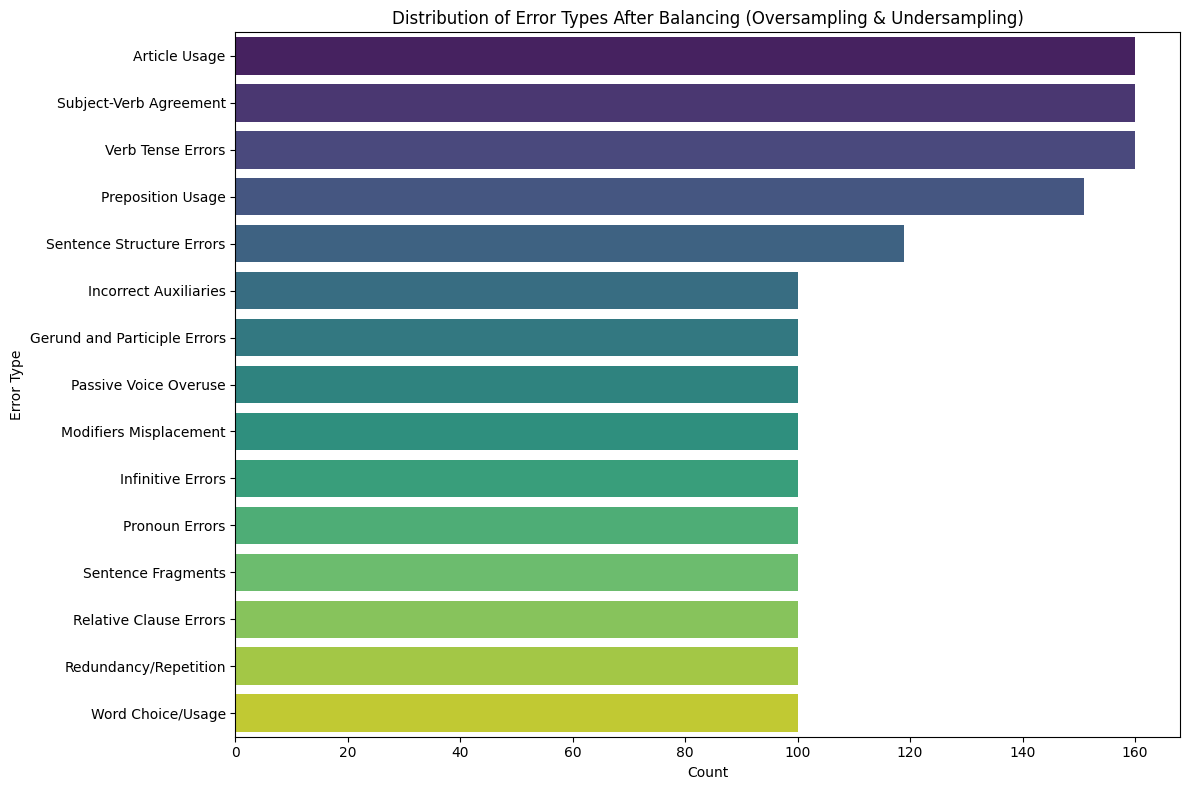


Dataset yang sudah di-balance disimpan ke '/content/Grammar_Correction_Balanced.csv'


In [ ]:
# Menonaktifkan peringatan yang tidak krusial
import warnings
warnings.filterwarnings('ignore')

# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


# --- 1. FUNGSI UNTUK MEMUAT ATAU MELATIH ULANG MODEL ---
# Dibungkus dalam fungsi agar lebih rapi dan bisa digunakan kembali

def load_or_train_model(training_data_path: str):
    """
    Mengecek apakah model 'pipeline' sudah ada di memori.
    Jika tidak, fungsi ini akan melatih model baru dari file CSV yang diberikan.
    """
    # Cek di scope global apakah variabel pipeline sudah ada
    # Perhatikan bahwa ini bergantung pada state notebook. Dalam skrip, akan selalu dilatih ulang.
    if 'pipeline' in globals() and 'label_encoder' in globals():
        print("Objek 'pipeline' dan 'label_encoder' model LightGBM ditemukan di memori.")
        return globals()['pipeline'], globals()['label_encoder']

    print("\nWARNING: Objek model tidak ditemukan. Melatih ulang model dari file sumber...")

    try:
        df_train_source = pd.read_csv(training_data_path)
        print(f"Melatih model dengan data dari '{training_data_path}': {len(df_train_source)} baris.")

        features = ['Ungrammatical Statement', 'Standard English']
        target = 'Error Type'

        # Inisialisasi dan fit LabelEncoder
        le = LabelEncoder()
        le.fit(df_train_source[target])

        # Definisikan preprocessor, pastikan konsisten dengan pelatihan sebelumnya
        # Menambahkan stop_words='english' pada TfidfVectorizer seperti di kode sebelumnya
        preprocessor = ColumnTransformer(
            transformers=[
                ('text_ungrammatical', TfidfVectorizer(max_features=3000, stop_words='english'), 'Ungrammatical Statement'),
                ('text_standard', TfidfVectorizer(max_features=3000, stop_words='english'), 'Standard English')
            ],
            remainder='passthrough'
        )

        # Definisikan pipeline
        # Menambahkan verbose=-1 pada LGBMClassifier seperti di kode sebelumnya
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', LGBMClassifier(random_state=42, verbose=-1))
        ])

        # Latih model
        y_train_encoded = le.transform(df_train_source[target])
        pipe.fit(df_train_source[features], y_train_encoded)
        print("Model LightGBM berhasil dilatih ulang.")
        # Simpan model dan encoder di scope global jika berhasil
        globals()['pipeline'] = pipe
        globals()['label_encoder'] = le
        return pipe, le

    except FileNotFoundError:
        print(f"ERROR: File latih '{training_data_path}' tidak ditemukan. Proses berhenti.")
        exit()
    except Exception as e:
        print(f"ERROR saat melatih ulang model: {e}. Proses berhenti.")
        exit()


# --- 2. PERSIAPAN DATA DAN EKSEKUSI SHADOW LABELING ---
# Bagian ini tampaknya tidak relevan langsung dengan error di sel ini,
# tetapi disertakan untuk kelengkapan kode jika sel ini dijalankan setelahnya.
# Ini juga menggunakan fungsi load_or_train_model
# try:
#     # Menggunakan nama file dari proses sebelumnya yang sudah pasti ada
#     df_augmentasi = pd.read_csv('augmentasi_no_label.csv')
#     print(f"Dataset augmentasi dimuat: {len(df_augmentasi)} baris.")
# except FileNotFoundError:
#     print("Pastikan file 'augmentasi_no_label.csv' ada di direktori yang sama.")
#     # exit() # Jangan keluar di sini, error handling ada di load_or_train_model

# # Memastikan nama kolom sesuai dengan yang diharapkan model
# column_rename_map = {'input': 'Ungrammatical Statement', 'target': 'Standard English'}
# df_augmentasi.rename(columns=column_rename_map, inplace=True, errors='ignore')

# # Verifikasi kolom yang dibutuhkan ada
# required_features = ['Ungrammatical Statement', 'Standard English']
# if not all(col in df_augmentasi.columns for col in required_features):
#     print(f"ERROR: File augmentasi harus memiliki kolom {required_features}.")
#     # exit() # Jangan keluar di sini

# # Panggil fungsi untuk mendapatkan model yang siap pakai
# # Menggunakan file '...Combined.csv' yang lebih pasti ada sebagai sumber model
# training_file_for_model = 'Grammar_Correction_Combined.csv'
# pipeline, label_encoder = load_or_train_model(training_file_for_model)

# # Lakukan prediksi (shadow labeling)
# if 'df_augmentasi' in globals() and not df_augmentasi.empty: # Cek jika df_augmentasi berhasil dimuat
#     print(f"\nMelakukan prediksi pada {len(df_augmentasi)} data augmentasi...")
#     # Pastikan hanya kolom fitur yang digunakan untuk prediksi
#     predicted_probabilities = pipeline.predict_proba(df_augmentasi[required_features])
#     predicted_class_indices = np.argmax(predicted_probabilities, axis=1)
#     max_probs = np.max(predicted_probabilities, axis=1)

#     # Tambahkan hasil prediksi ke dataframe
#     df_augmentasi['Error Type'] = label_encoder.inverse_transform(predicted_class_indices)
#     df_augmentasi['Confidence Score'] = max_probs
#     print("Prediksi selesai.")

#     # --- 3. MENYIMPAN DAN MENGANALISIS HASIL ---

#     output_filename = 'augmentasi_shadow_labeled.csv'
#     df_augmentasi.to_csv(output_filename, index=False)
#     print(f"\nHasil shadow labeling disimpan ke '{output_filename}'")
#     print("\nContoh hasil:")
#     print(df_augmentasi.head())

#     # Analisis Distribusi Error Type
#     print("\nDistribusi Error Type pada data hasil shadow labeling:")
#     print(df_augmentasi['Error Type'].value_counts())

#     # Visualisasi Distribusi Error Type
#     plt.figure(figsize=(12, 8))
#     sns.countplot(data=df_augmentasi, y='Error Type', order=df_augmentasi['Error Type'].value_counts().index, palette='viridis')
#     plt.title('Distribusi Error Type Hasil Shadow Labeling')
#     plt.xlabel('Jumlah')
#     plt.ylabel('Jenis Error')
#     plt.tight_layout()
#     plt.show()

#     # Analisis Distribusi Confidence Score
#     print("\nStatistik Deskriptif untuk Confidence Score:")
#     print(df_augmentasi['Confidence Score'].describe())

#     # Visualisasi Distribusi Confidence Score
#     plt.figure(figsize=(10, 6))
#     sns.histplot(df_augmentasi['Confidence Score'], bins=50, kde=True)
#     plt.title('Distribusi Confidence Score untuk Shadow Label')
#     plt.xlabel('Confidence Score')
#     plt.ylabel('Frekuensi')
#     plt.show()
# else:
#     print("Data augmentasi tidak tersedia atau kosong. Shadow labeling dilewati.")


# --- Kode dari sel yang error dimulai di sini ---

# Memuat DataFrame df_final_combined (asumsi sudah dimuat di sel sebelumnya)
# Jika belum dimuat, perlu memuatnya dari file
# try:
#     df_final_combined = pd.read_csv('/content/Grammar_Correction_Combined.csv')
#     print("Dataset gabungan 'Grammar_Correction_Combined.csv' dimuat ulang.")
# except FileNotFoundError:
#     print("ERROR: File 'Grammar_Correction_Combined.csv' tidak ditemukan. Pastikan proses sebelumnya berhasil.")
#     exit()

# Cek distribusi kelas saat ini
class_distribution = df_final_combined['Error Type'].value_counts()
print("Class distribution before balancing:")
print(class_distribution)

# Definisikan strategi oversampling dan undersampling
sampling_strategy = {}

# Target untuk oversampling (kelas dengan count < 100 -> target 100)
# Menggunakan nama variabel class_count
for cls, class_count in class_distribution.items():
    if class_count < 100:
        sampling_strategy[cls] = 100

# Target untuk undersampling (kelas dengan count > 200 -> target 160)
# Menggunakan nama variabel class_count
for cls, class_count in class_distribution.items():
    if class_count > 200:
        # Pastikan tidak ada kelas yang terdaftar untuk oversampling dan undersampling sekaligus
        if cls not in sampling_strategy:
             sampling_strategy[cls] = 160
        else:
             # Jika ada kelas yang memenuhi kedua kondisi (count < 100 dan > 200, yang tidak mungkin),
             # logika di atas sudah mencegahnya. Tapi ini hanya untuk keamanan.
             print(f"Warning: Class '{cls}' is in both oversampling and undersampling targets. Skipping.")


print("\nCalculated sampling strategy:")
print(sampling_strategy)

# Pisahkan fitur (X) dan target (y)
X = df_final_combined[['Ungrammatical Statement', 'Standard English']]
y = df_final_combined['Error Type']

# Lakukan oversampling terlebih dahulu untuk kelas di bawah 100
# Menggunakan nama variabel class_count untuk membandingkan dengan ambang batas
if any(class_count < 100 for class_count in class_distribution.values): # Menggunakan .values untuk iterasi efisien
    print("\nPerforming Random Oversampling for classes below 100...")
    # Filter sampling_strategy hanya untuk oversampling
    oversample_strategy = {cls: count for cls, count in sampling_strategy.items() if class_distribution.get(cls, 0) < 100}
    if oversample_strategy:
        ros = RandomOverSampler(sampling_strategy=oversample_strategy, random_state=42)
        X_resampled, y_resampled = ros.fit_resample(X, y)
        # Menggunakan pd.DataFrame dan pd.Series dengan ignore_index=True untuk menggabungkan
        df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns).reset_index(drop=True),
                                 pd.Series(y_resampled, name='Error Type').reset_index(drop=True)], axis=1)

        print(f"Data size after oversampling: {len(df_balanced)}")
    else:
        df_balanced = df_final_combined.copy() # No oversampling needed
        print("No classes below 100 found for oversampling.")
else:
     df_balanced = df_final_combined.copy() # No oversampling needed
     print("No classes below 100 found for oversampling.")

# Sekarang lakukan undersampling pada data yang mungkin sudah dioversampling
# Kita perlu menghitung distribusi baru setelah oversampling untuk menentukan target undersampling
class_distribution_after_os = df_balanced['Error Type'].value_counts()
print("\nClass distribution after oversampling:")
print(class_distribution_after_os)


# Menggunakan nama variabel class_count untuk membandingkan dengan ambang batas
if any(class_count > 200 for class_count in class_distribution_after_os.values): # Menggunakan .values
    print("\nPerforming Random Undersampling for classes above 200...")
    # Filter sampling_strategy hanya untuk undersampling
    undersample_strategy = {cls: count for cls, count in sampling_strategy.items() if class_distribution_after_os.get(cls, 0) > 200}
    if undersample_strategy:
        rus = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)
        X_final_balanced, y_final_balanced = rus.fit_resample(df_balanced[['Ungrammatical Statement', 'Standard English']], df_balanced['Error Type'])
         # Menggunakan pd.DataFrame dan pd.Series dengan ignore_index=True untuk menggabungkan
        df_final_balanced = pd.concat([pd.DataFrame(X_final_balanced, columns=X.columns).reset_index(drop=True),
                                       pd.Series(y_final_balanced, name='Error Type').reset_index(drop=True)], axis=1)
        print(f"Data size after undersampling: {len(df_final_balanced)}")
    else:
        df_final_balanced = df_balanced.copy() # No undersampling needed
        print("No classes above 200 found for undersampling.")
else:
     df_final_balanced = df_balanced.copy() # No undersampling needed
     print("No classes above 200 found for undersampling.")


# Cek distribusi kelas setelah balancing
print("\nFinal class distribution after balancing:")
print(df_final_balanced['Error Type'].value_counts())

# Visualisasikan distribusi kelas setelah balancing
plt.figure(figsize=(12, 8))
sns.countplot(data=df_final_balanced, y='Error Type', order = df_final_balanced['Error Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Error Types After Balancing (Oversampling & Undersampling)')
plt.xlabel('Count')
plt.ylabel('Error Type')
plt.tight_layout()
plt.show()

# Simpan dataset yang sudah di-balance
output_balanced_filename = '/content/Grammar_Correction_Balanced.csv'
df_final_balanced.to_csv(output_balanced_filename, index=False)
print(f"\nDataset yang sudah di-balance disimpan ke '{output_balanced_filename}'")